# Import packages and GloVe vocabulary

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np
from scipy import spatial
import random

urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

!unzip "/content/glove.6B.zip" -d "/content/"

embed_dict = {}
with open('/content/glove.6B.200d.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:],'float32')
    embed_dict[word]=vector

Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


In [2]:
!pip install chamferdist

import torch
import tensorflow as tf
from chamferdist import ChamferDistance

# Initialize Chamfer distance module
chamferDist = ChamferDistance()

import requests

word_site = "https://www.mit.edu/~ecprice/wordlist.10000"

response = requests.get(word_site)
WORDS = response.content.splitlines()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for chamferdist: filename=chamferdist-1.0.0-cp37-cp37m-linux_x86_64.whl size=2634210 sha256=f7601c52f453c09b36238dd04478fc63757f96e5537762cf98ceab24fe151b82
  Stored in directory: /root/.cache/pip/wheels/28/bb/d1/c789ecd6835e466e813f6e2c5e23bb1bbb2248e84586ba82d2
Successfully built chamferdist


# We retrieve GloVe vocabulary

In [3]:
GloVe_words = list(embed_dict.keys())

# CD distribution

**Now we compute the CD distributions**

For each $N \in \left\{ 0, 1, 2, ..., 22 \right\}$,  we create 2 sets of 22 random words that have $N$ words in common and compute the Chamfer Distance. This is because we want to simulate random topics and observe their CD distribution with respect to the number of words $N$ they have in common. We iterate this process 50,000 times, therefore for each $N$ we obtain 50,000 CD values of topics that have $N$ words in common.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


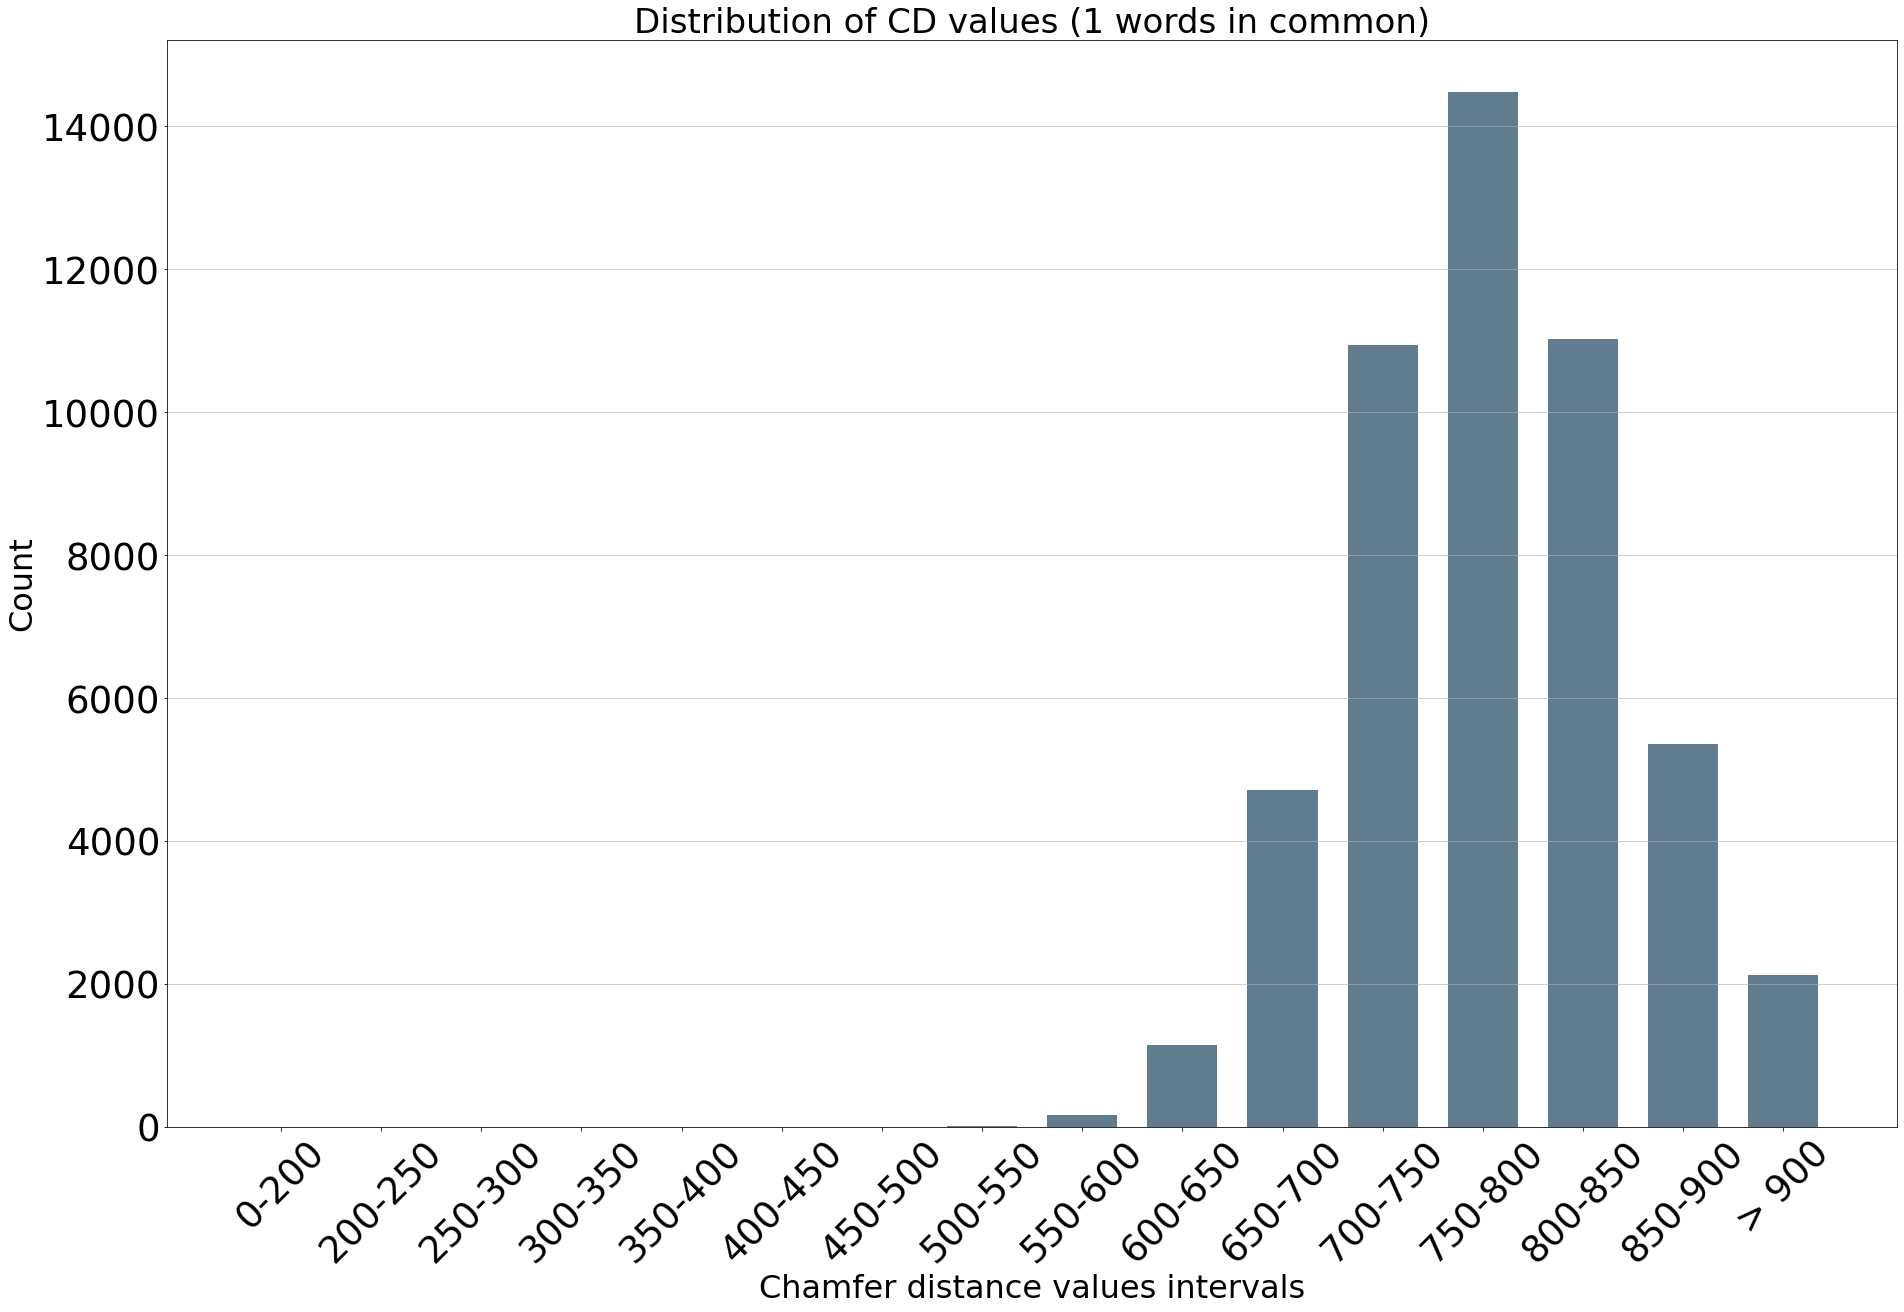

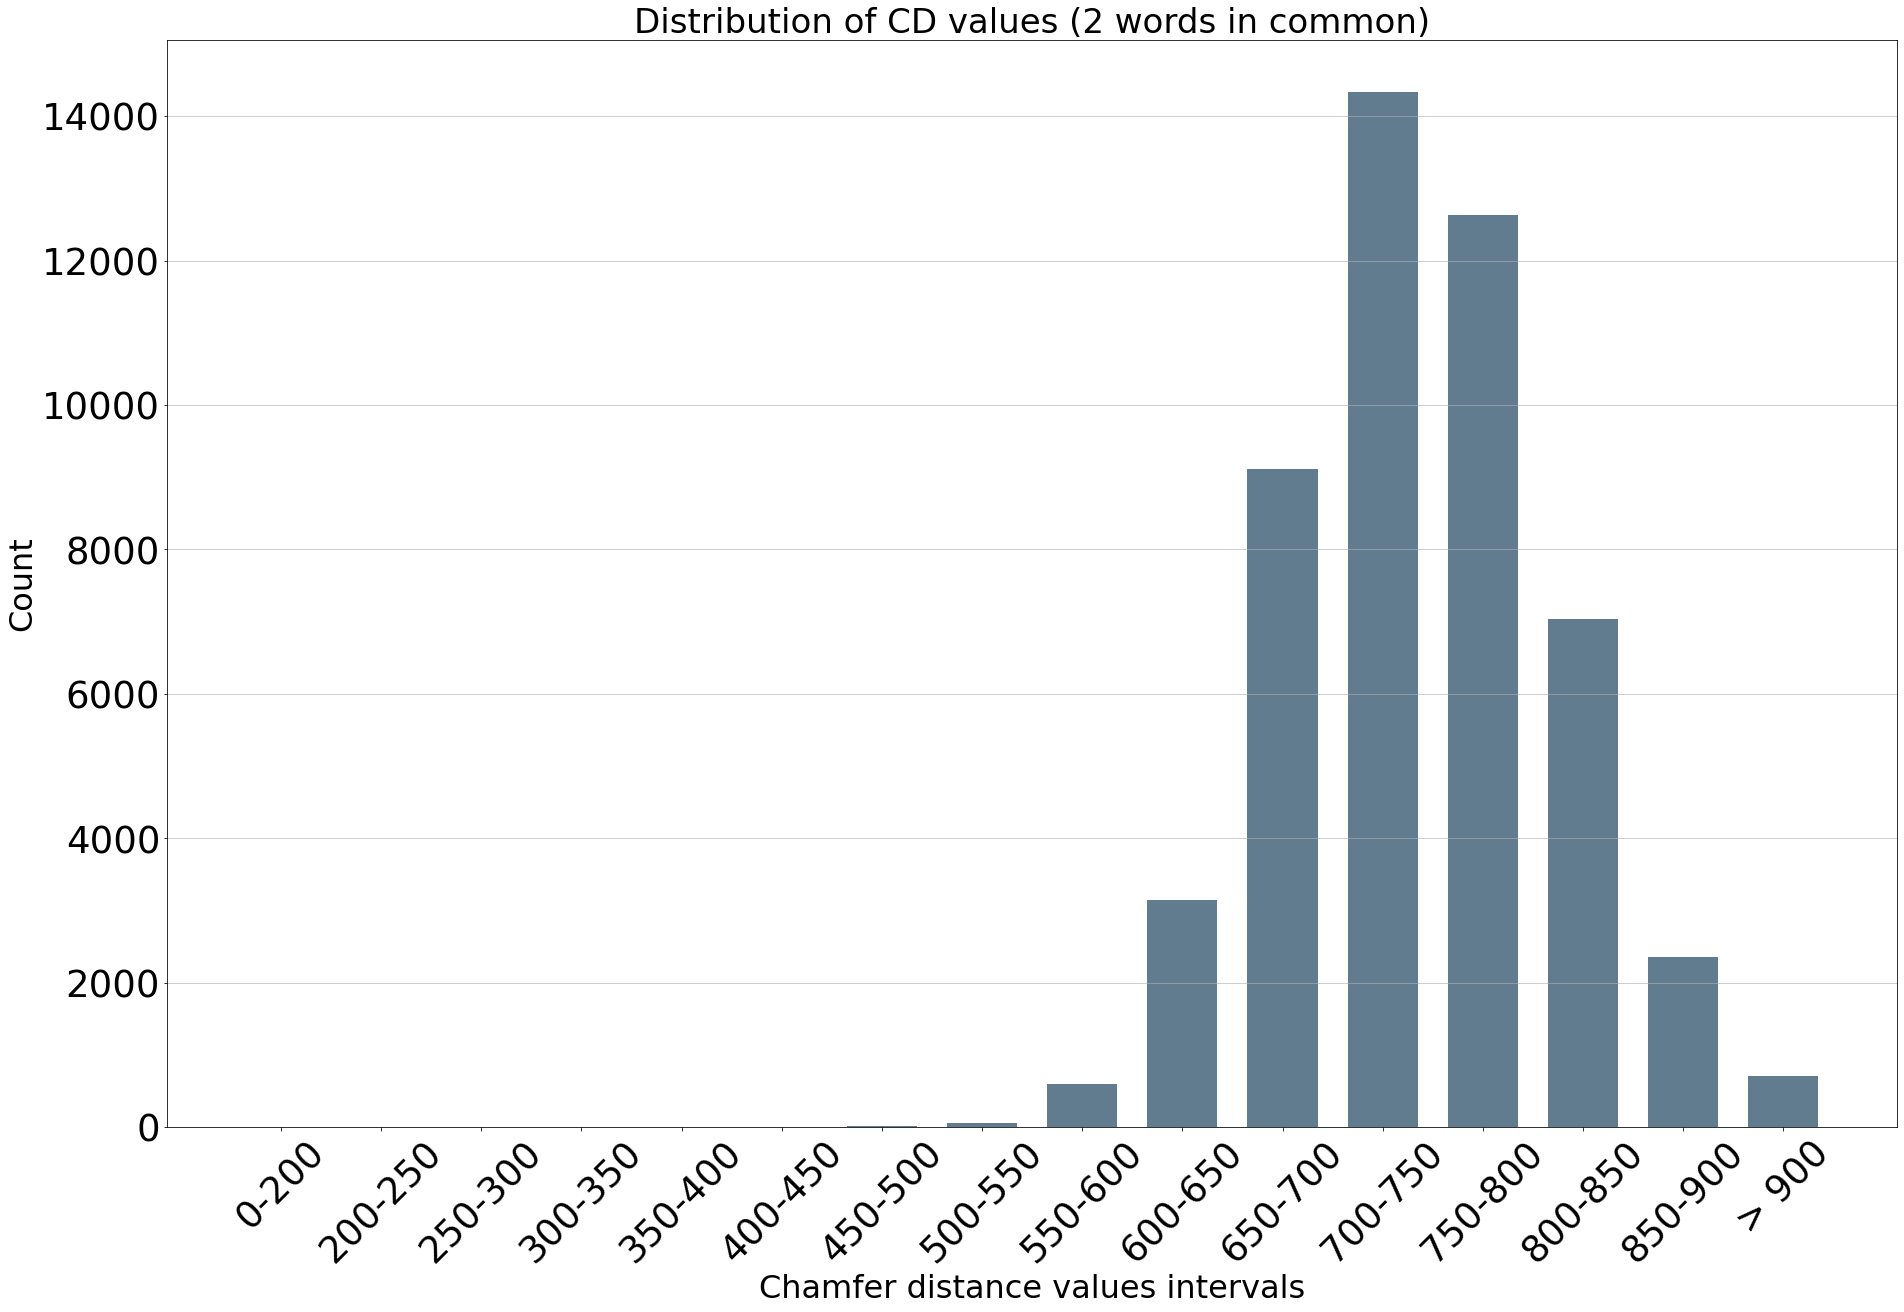

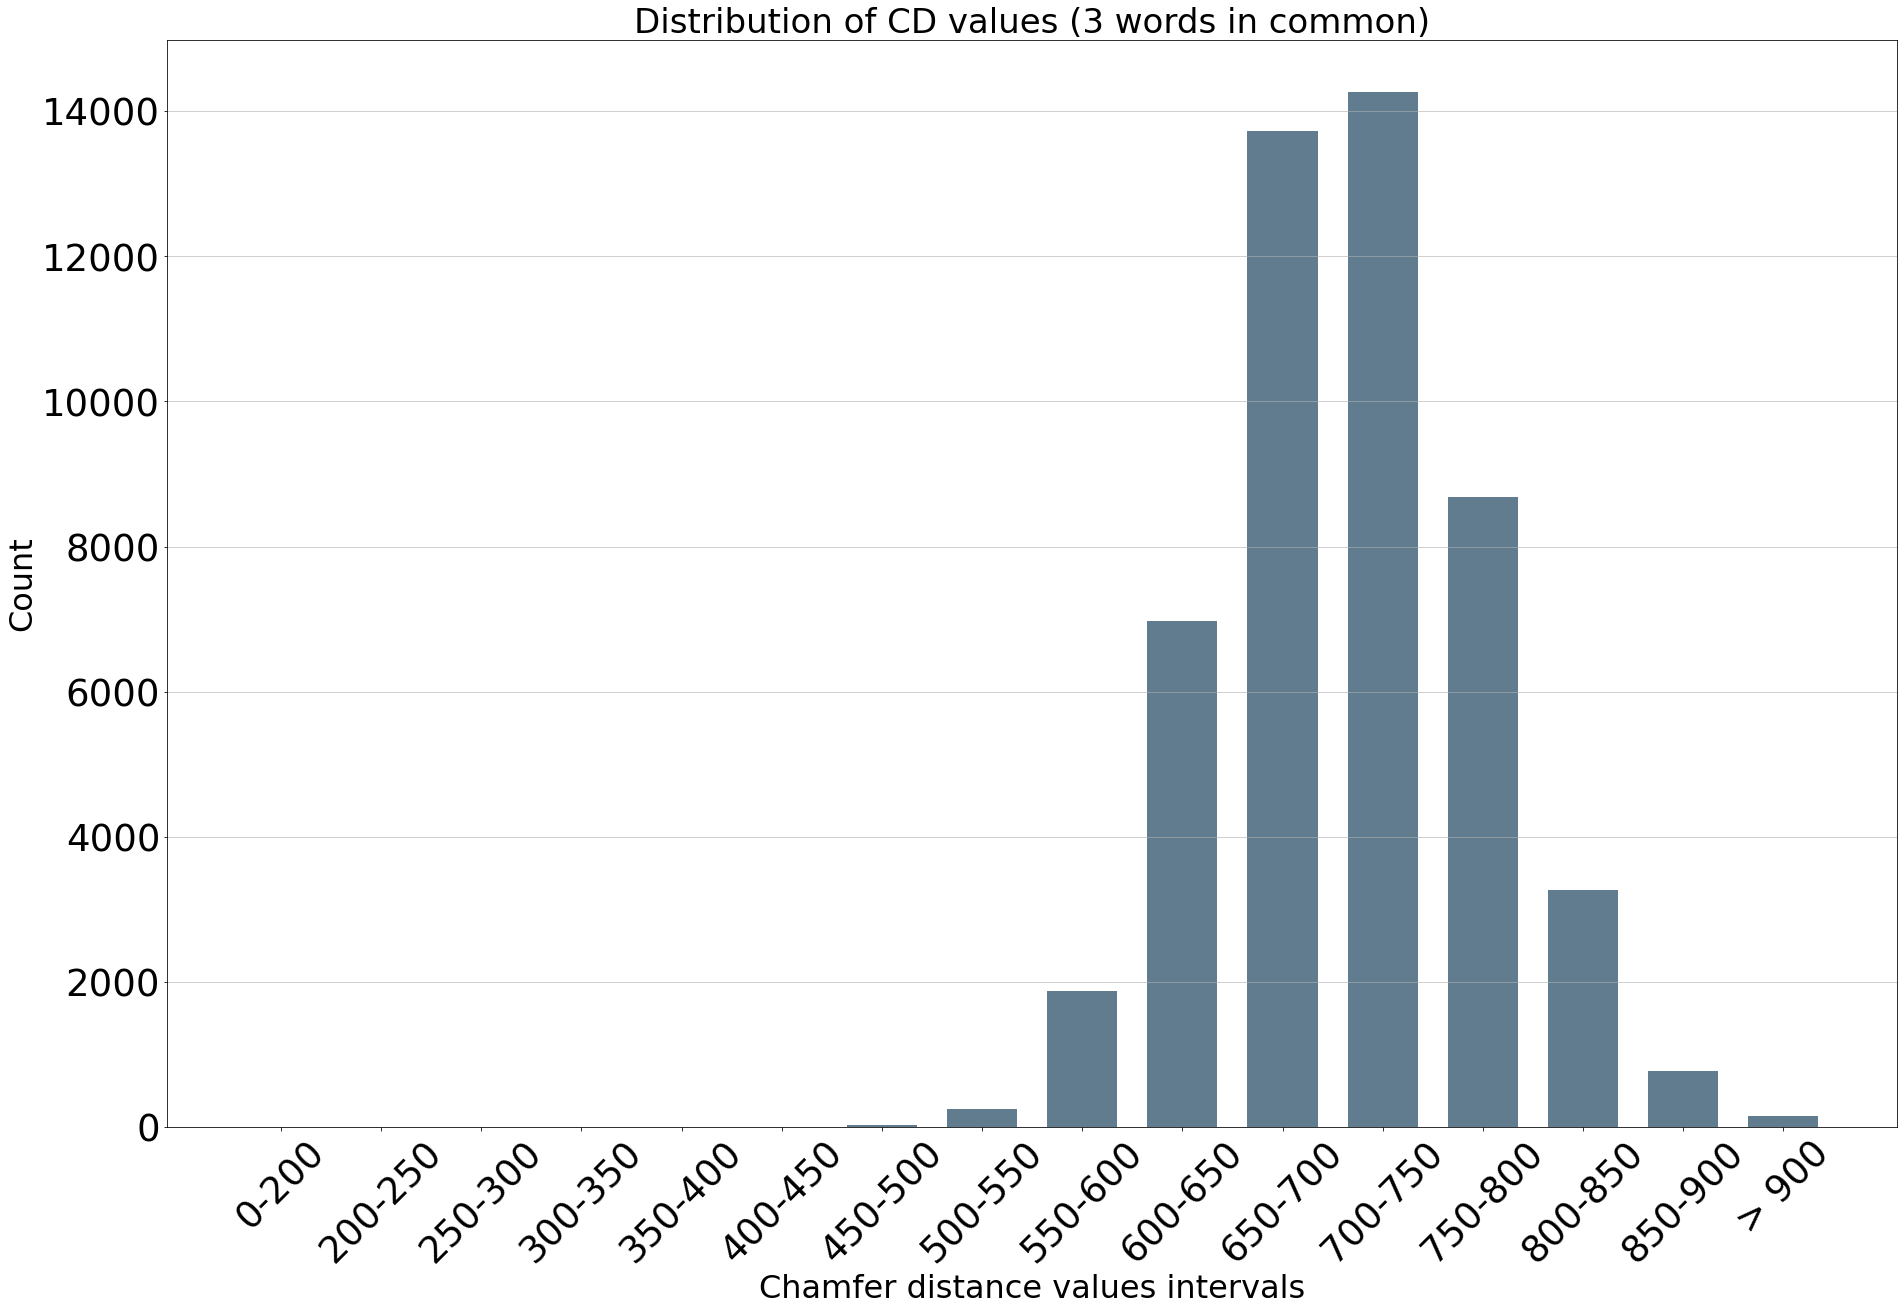

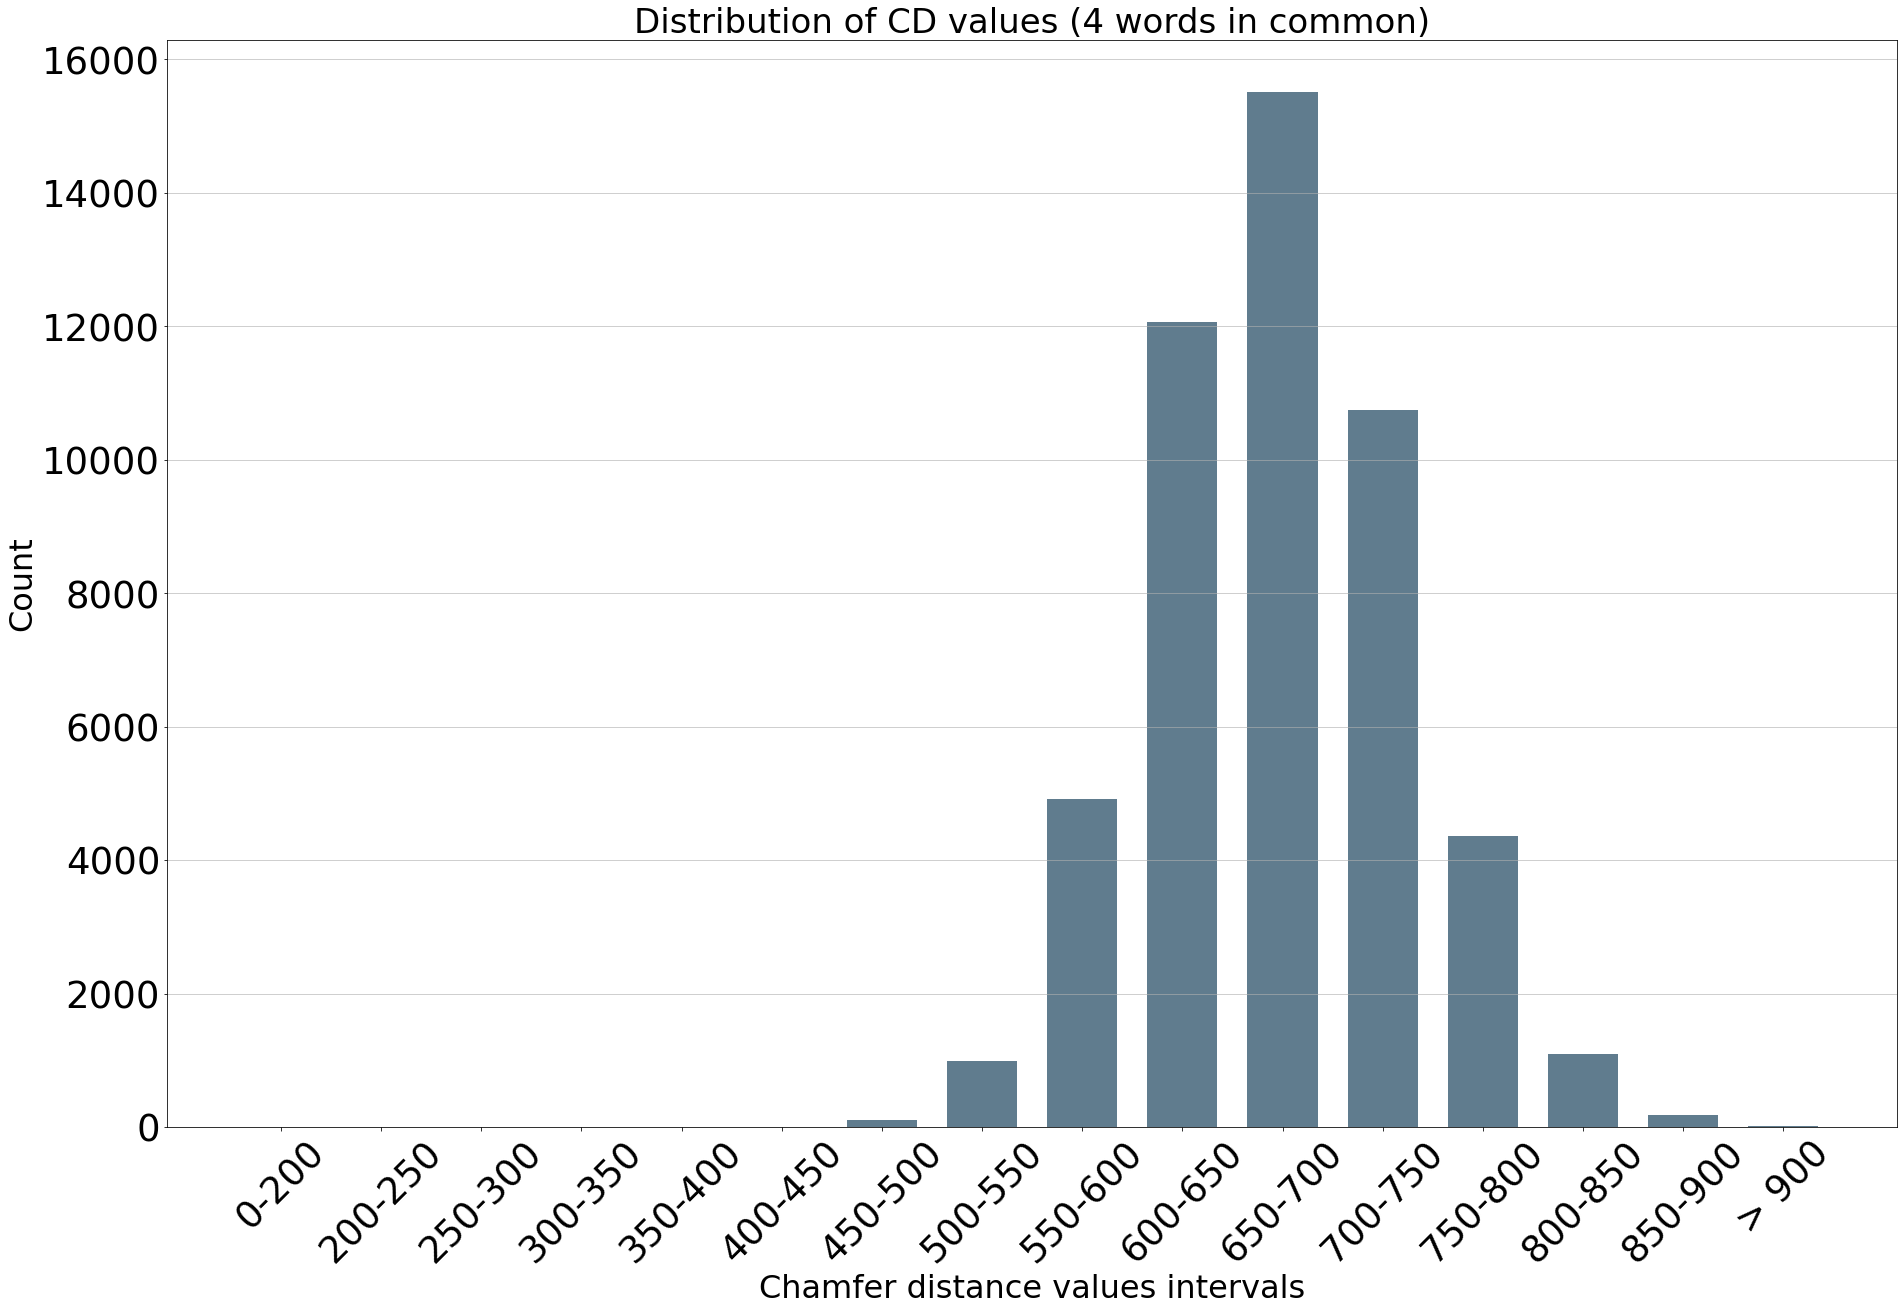

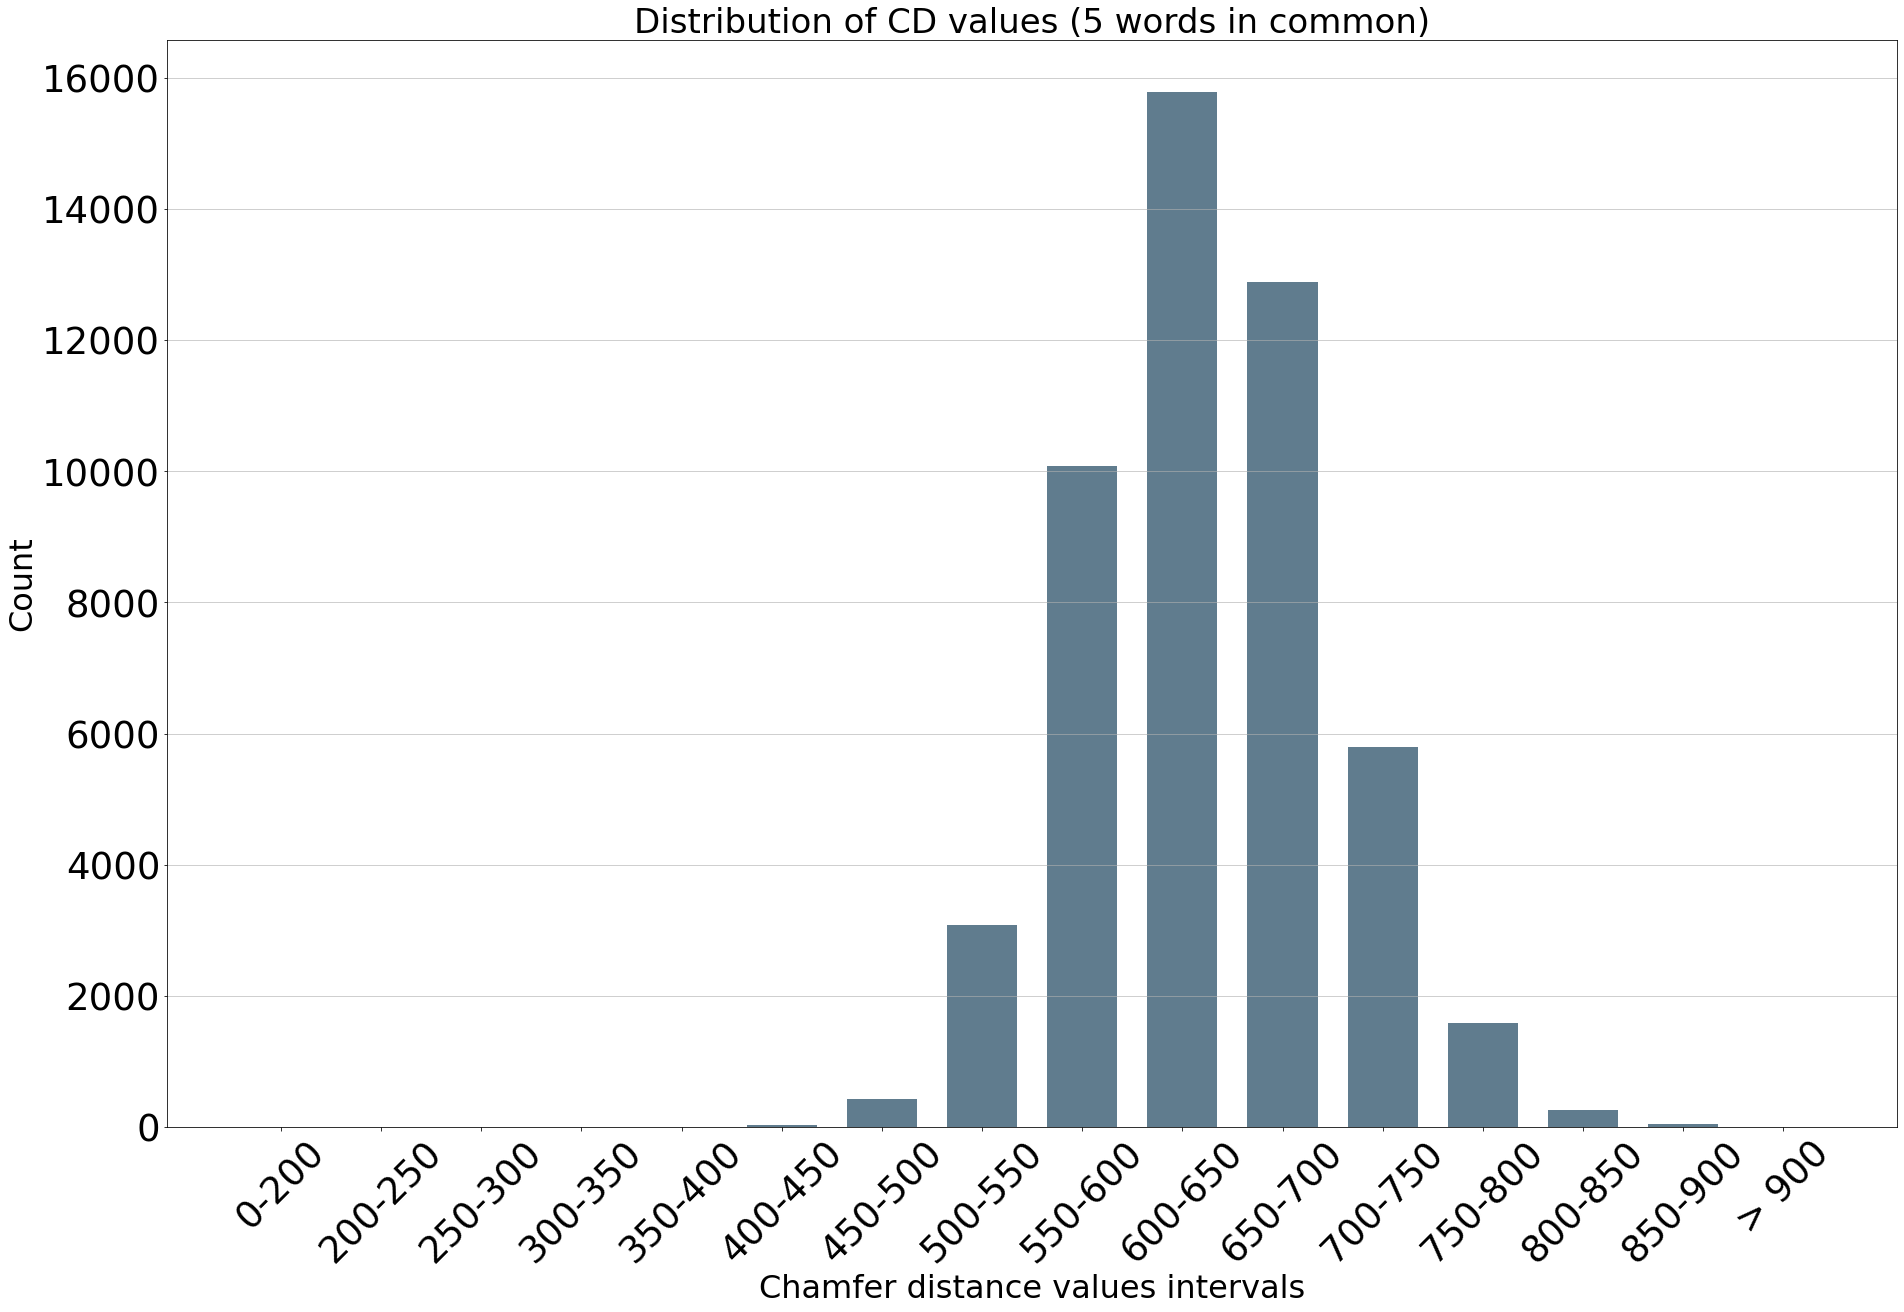

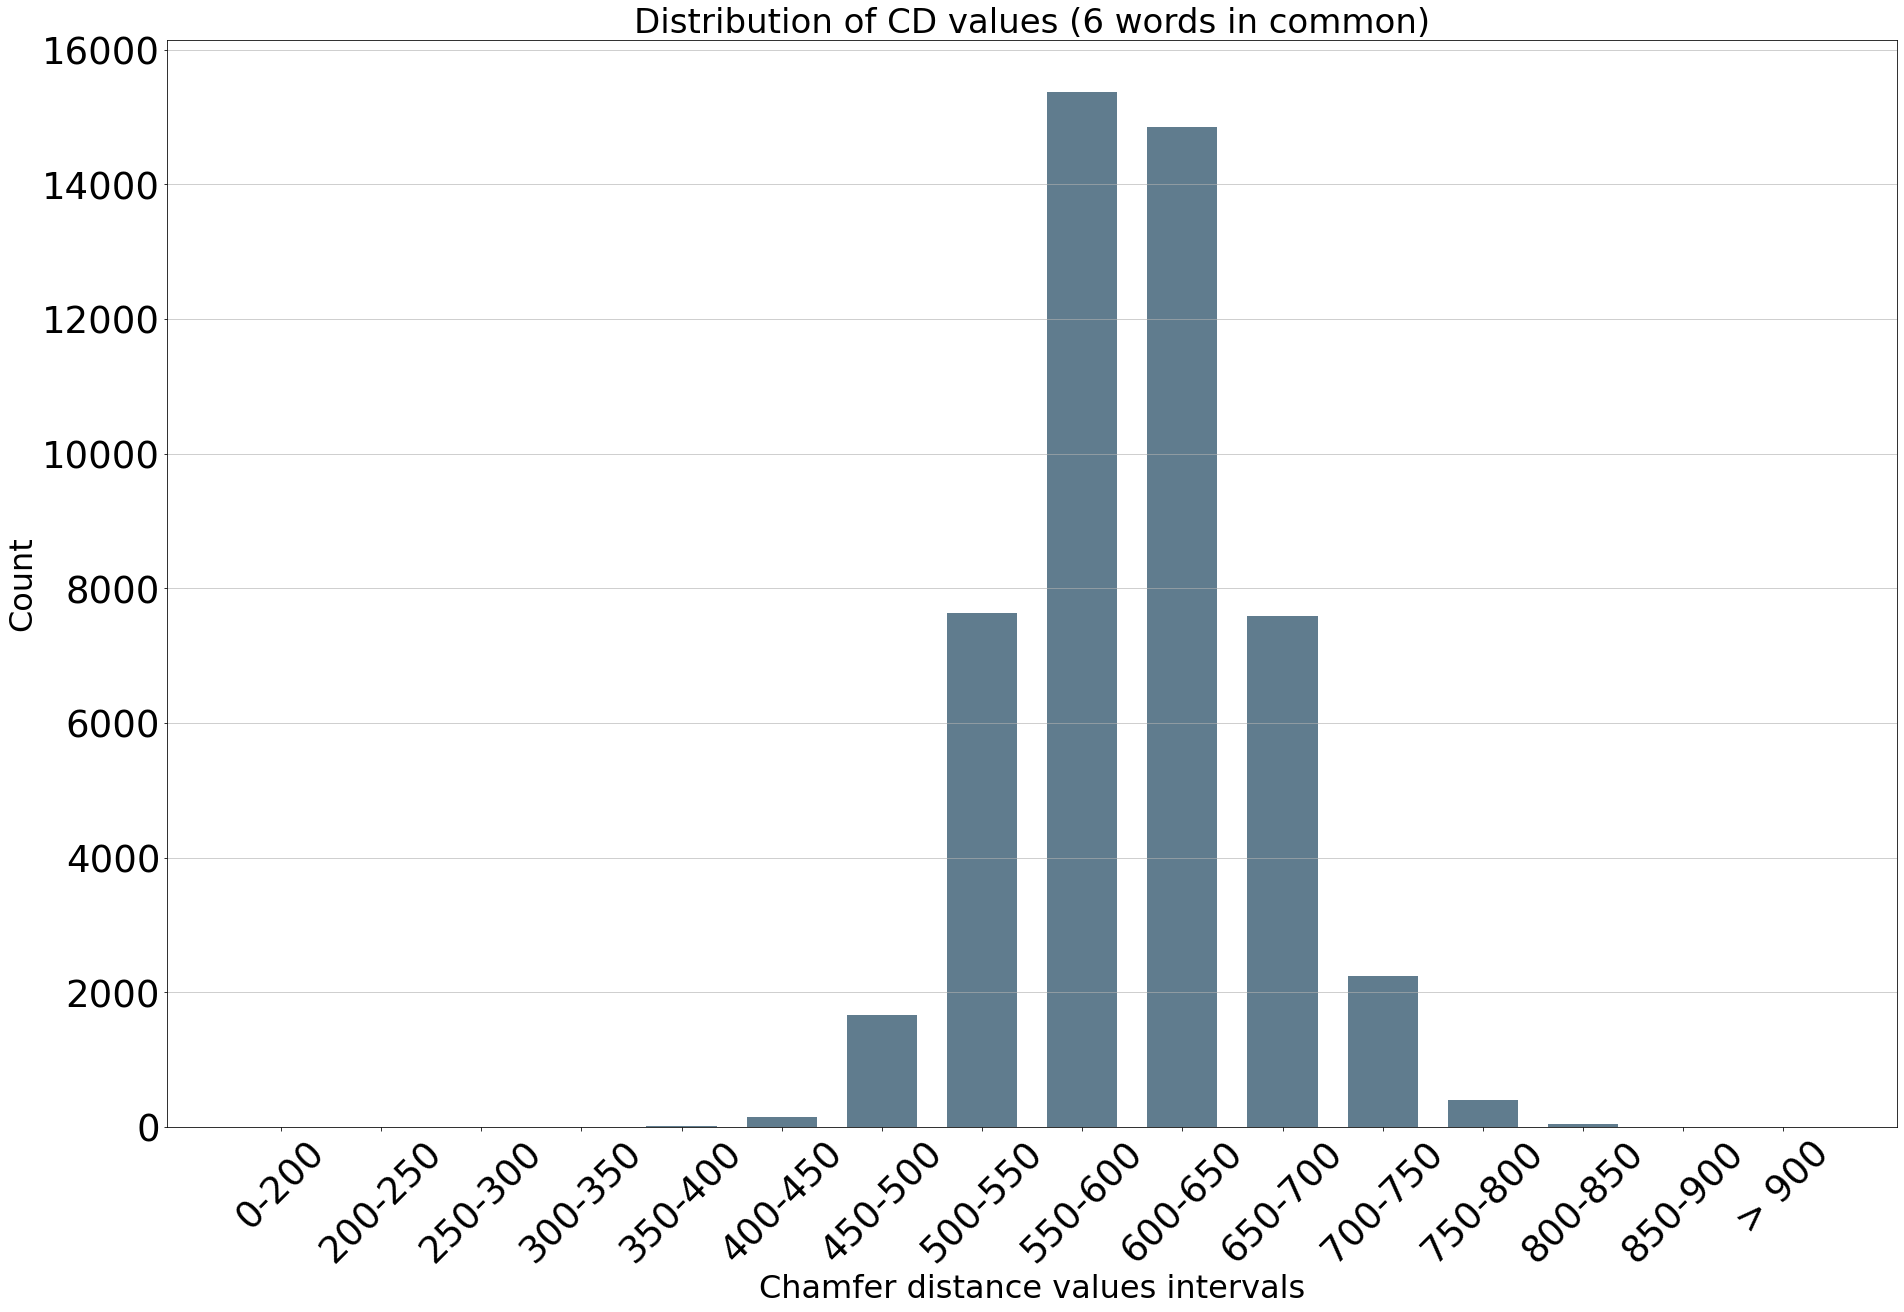

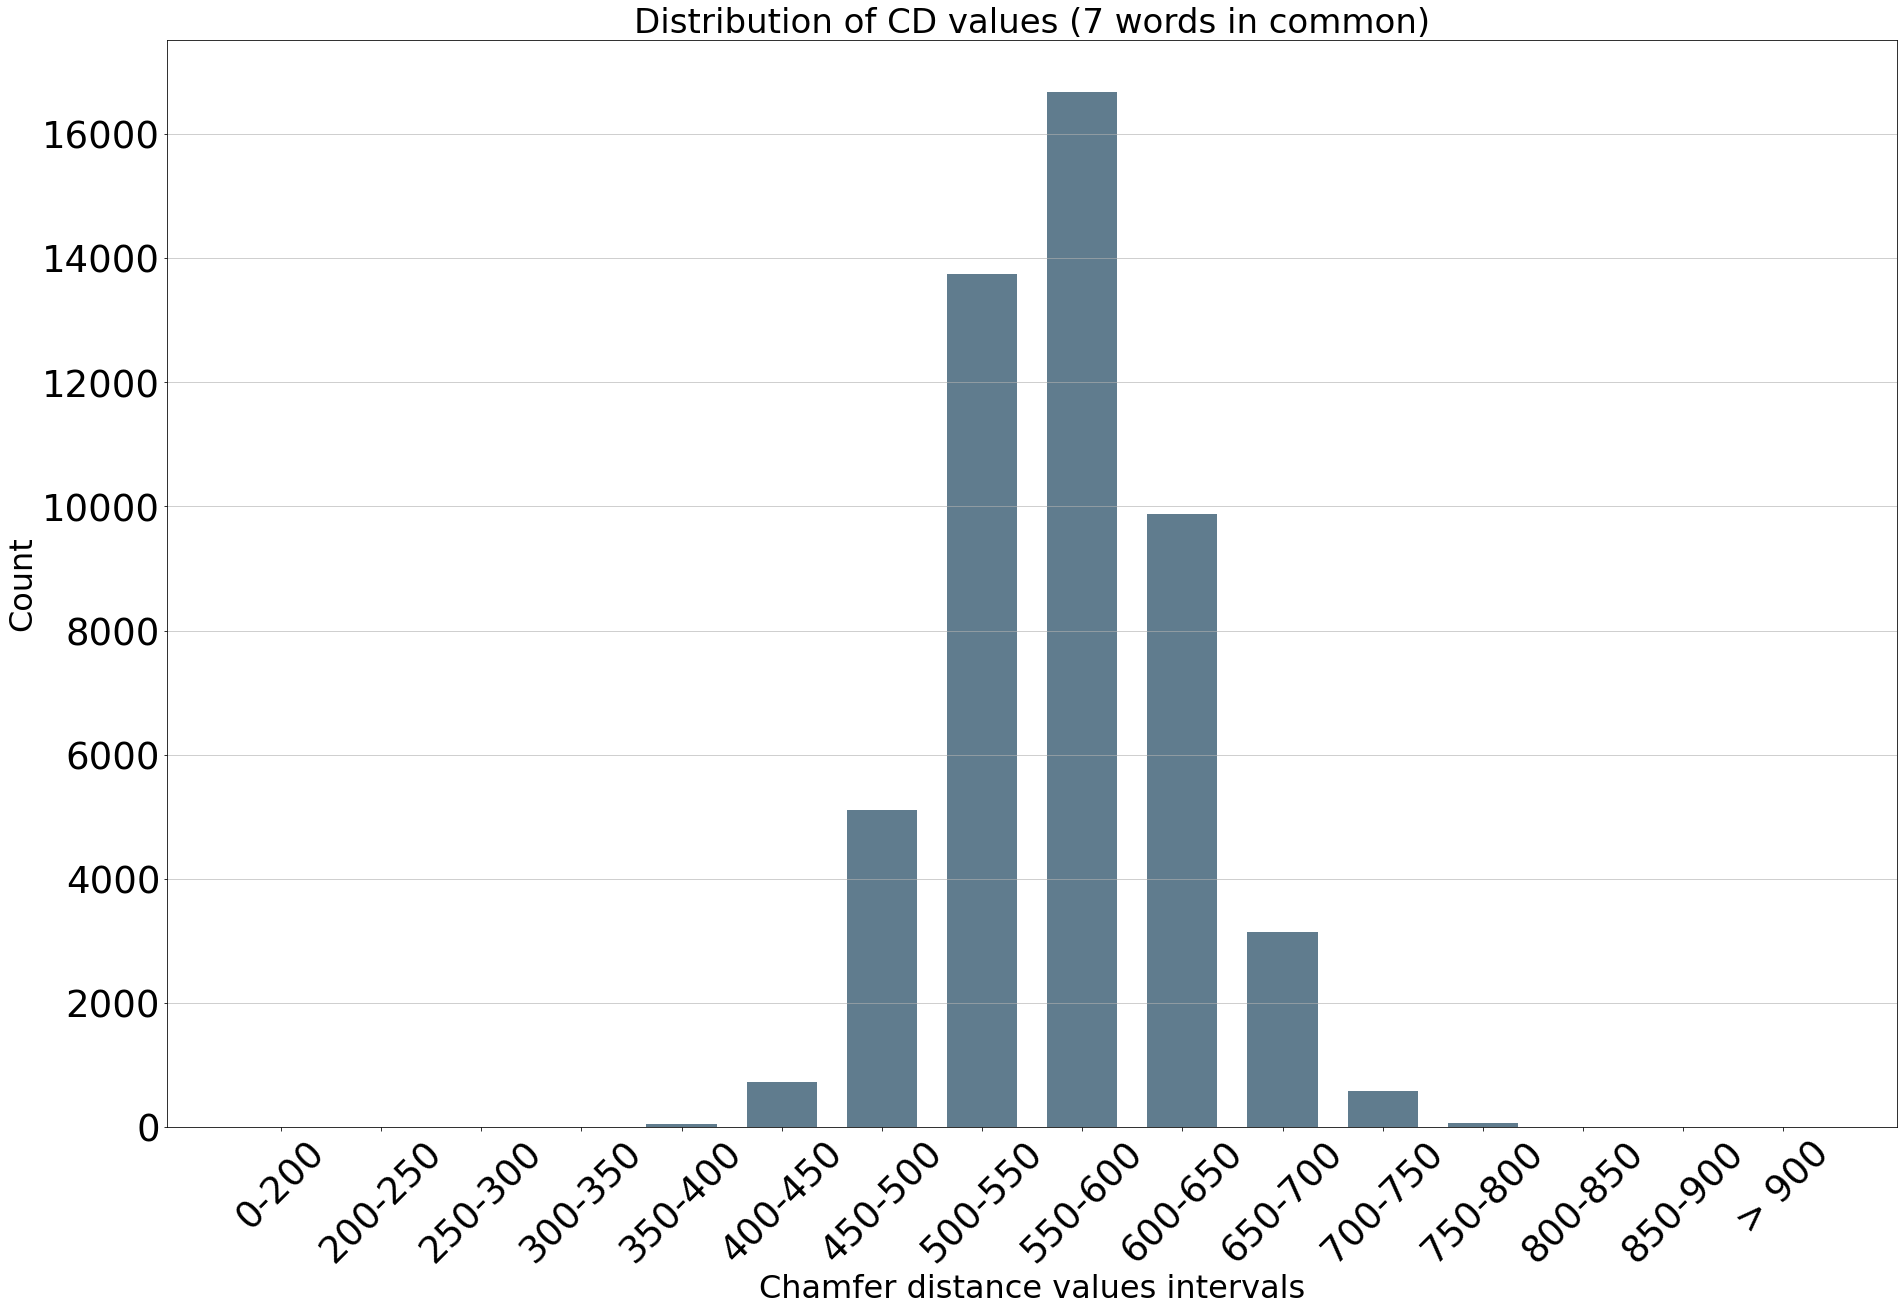

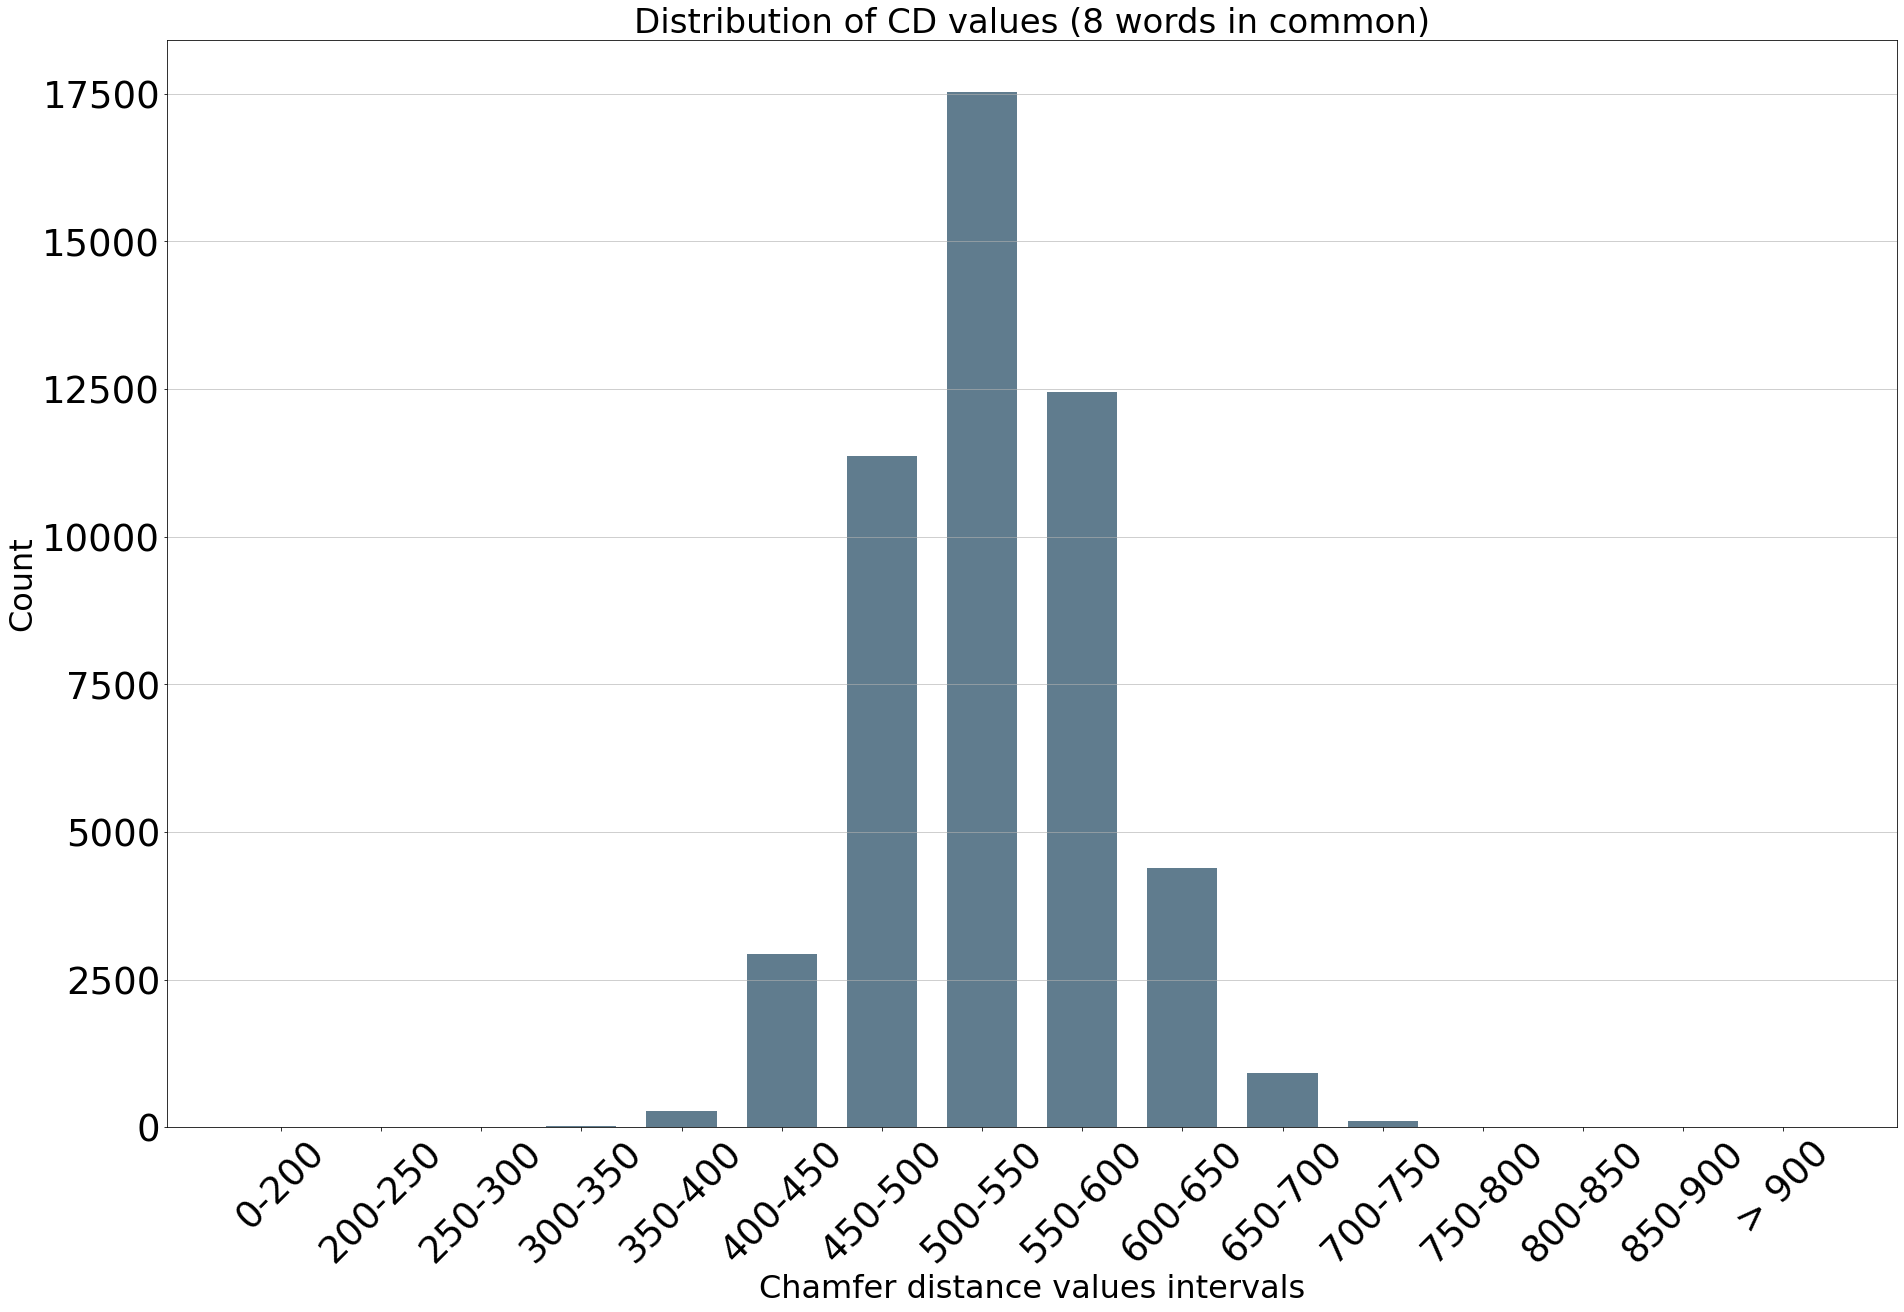

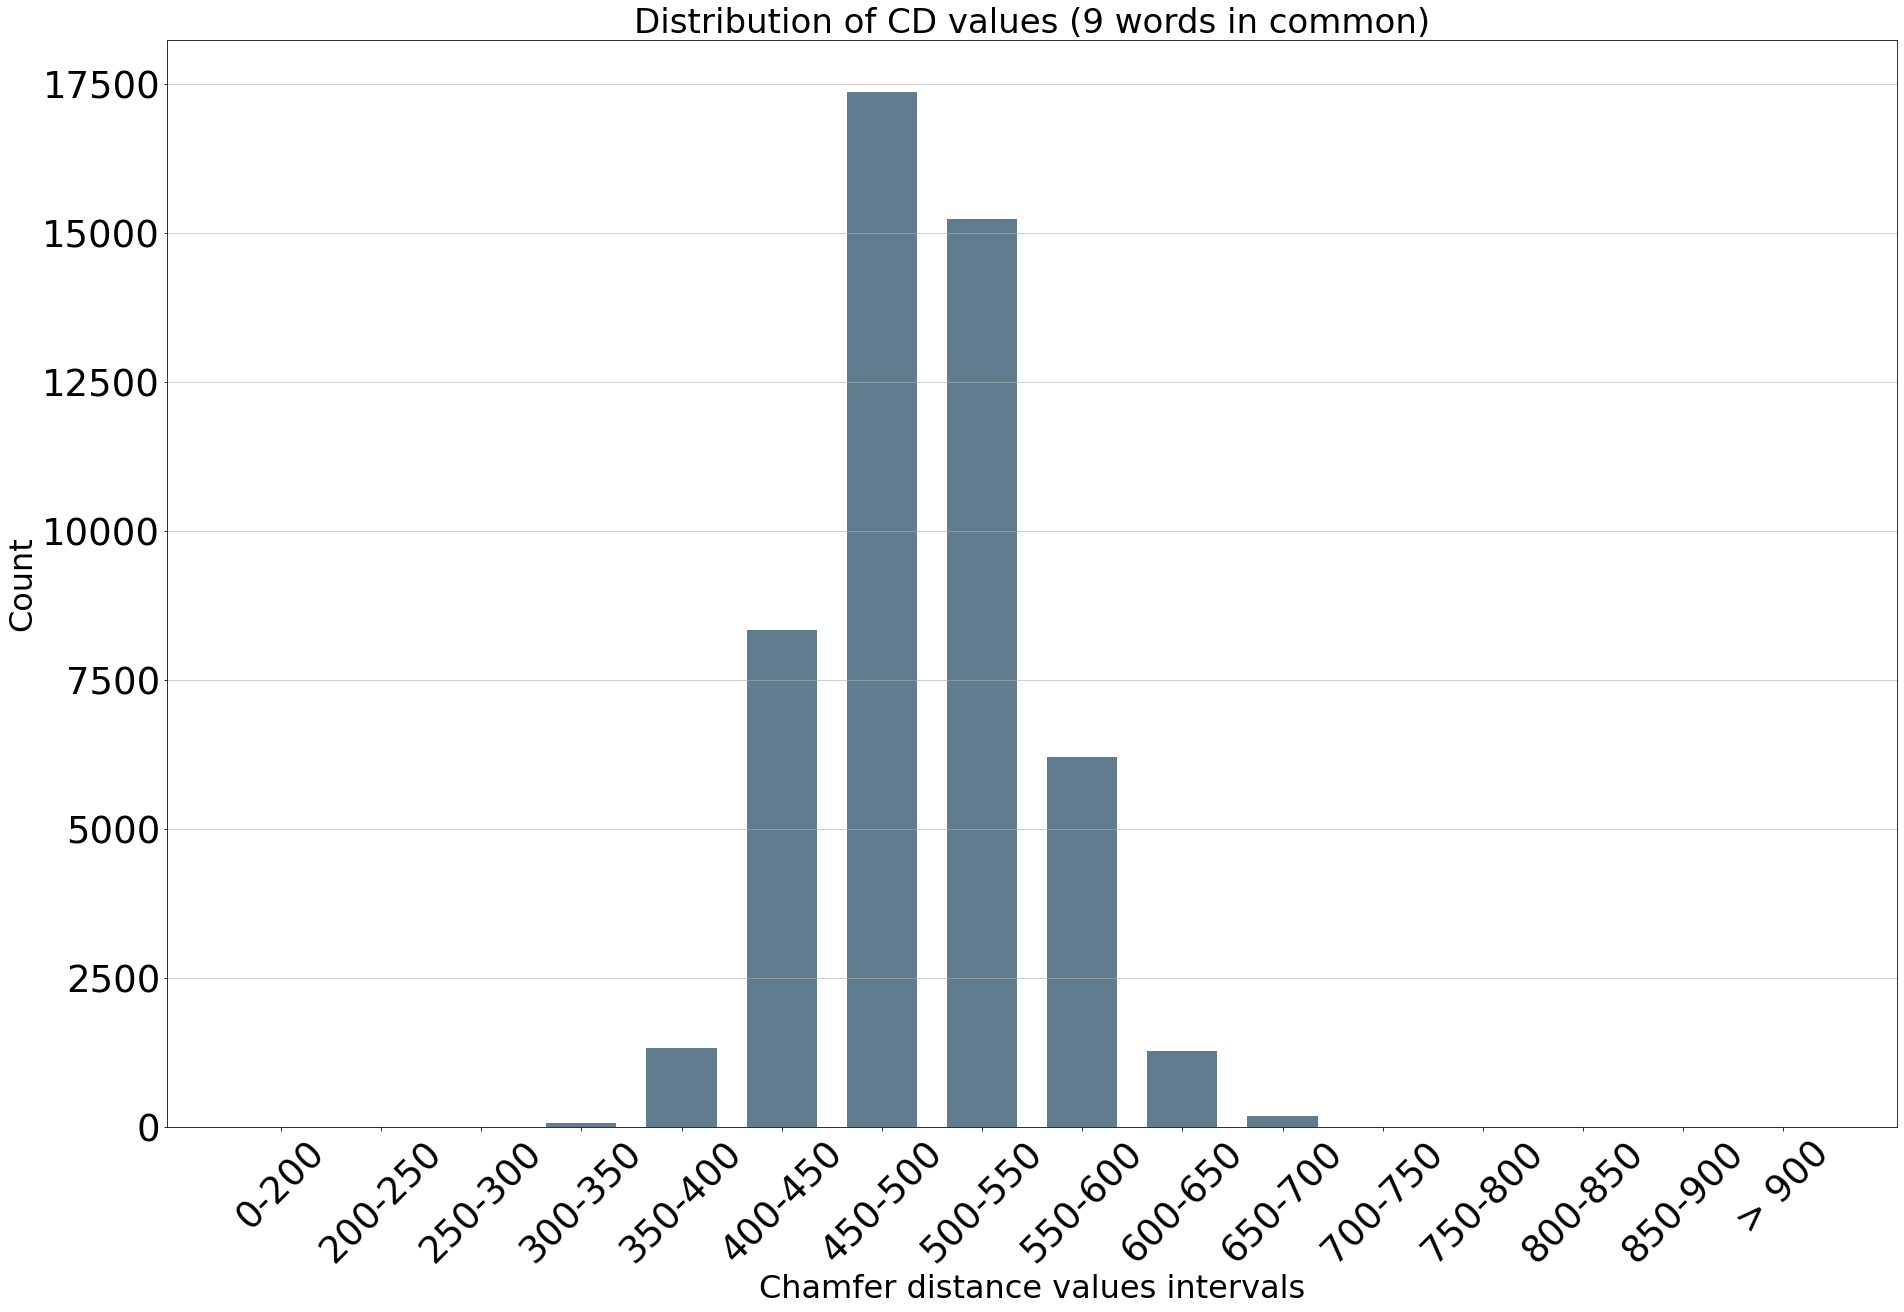

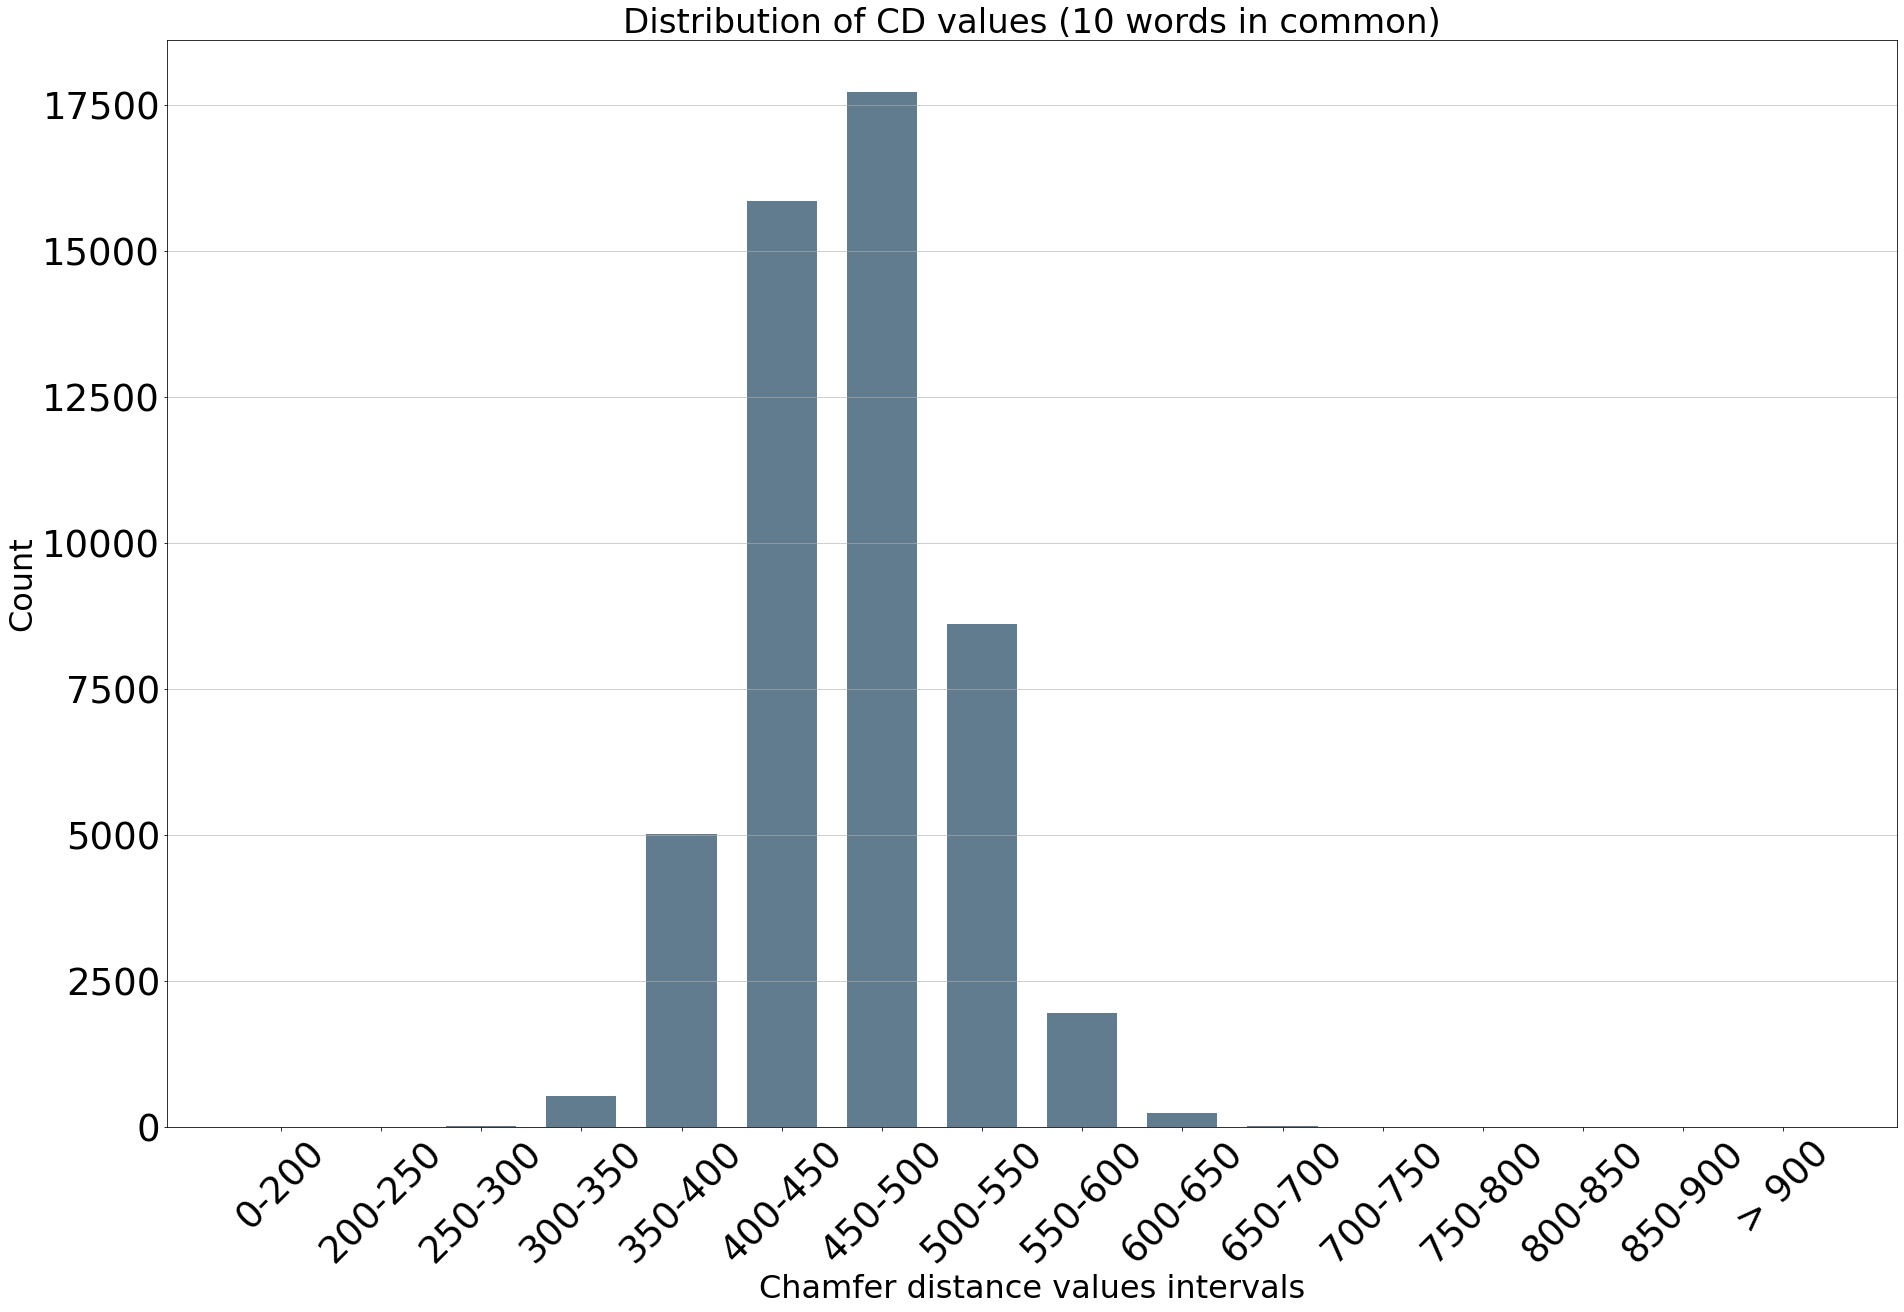

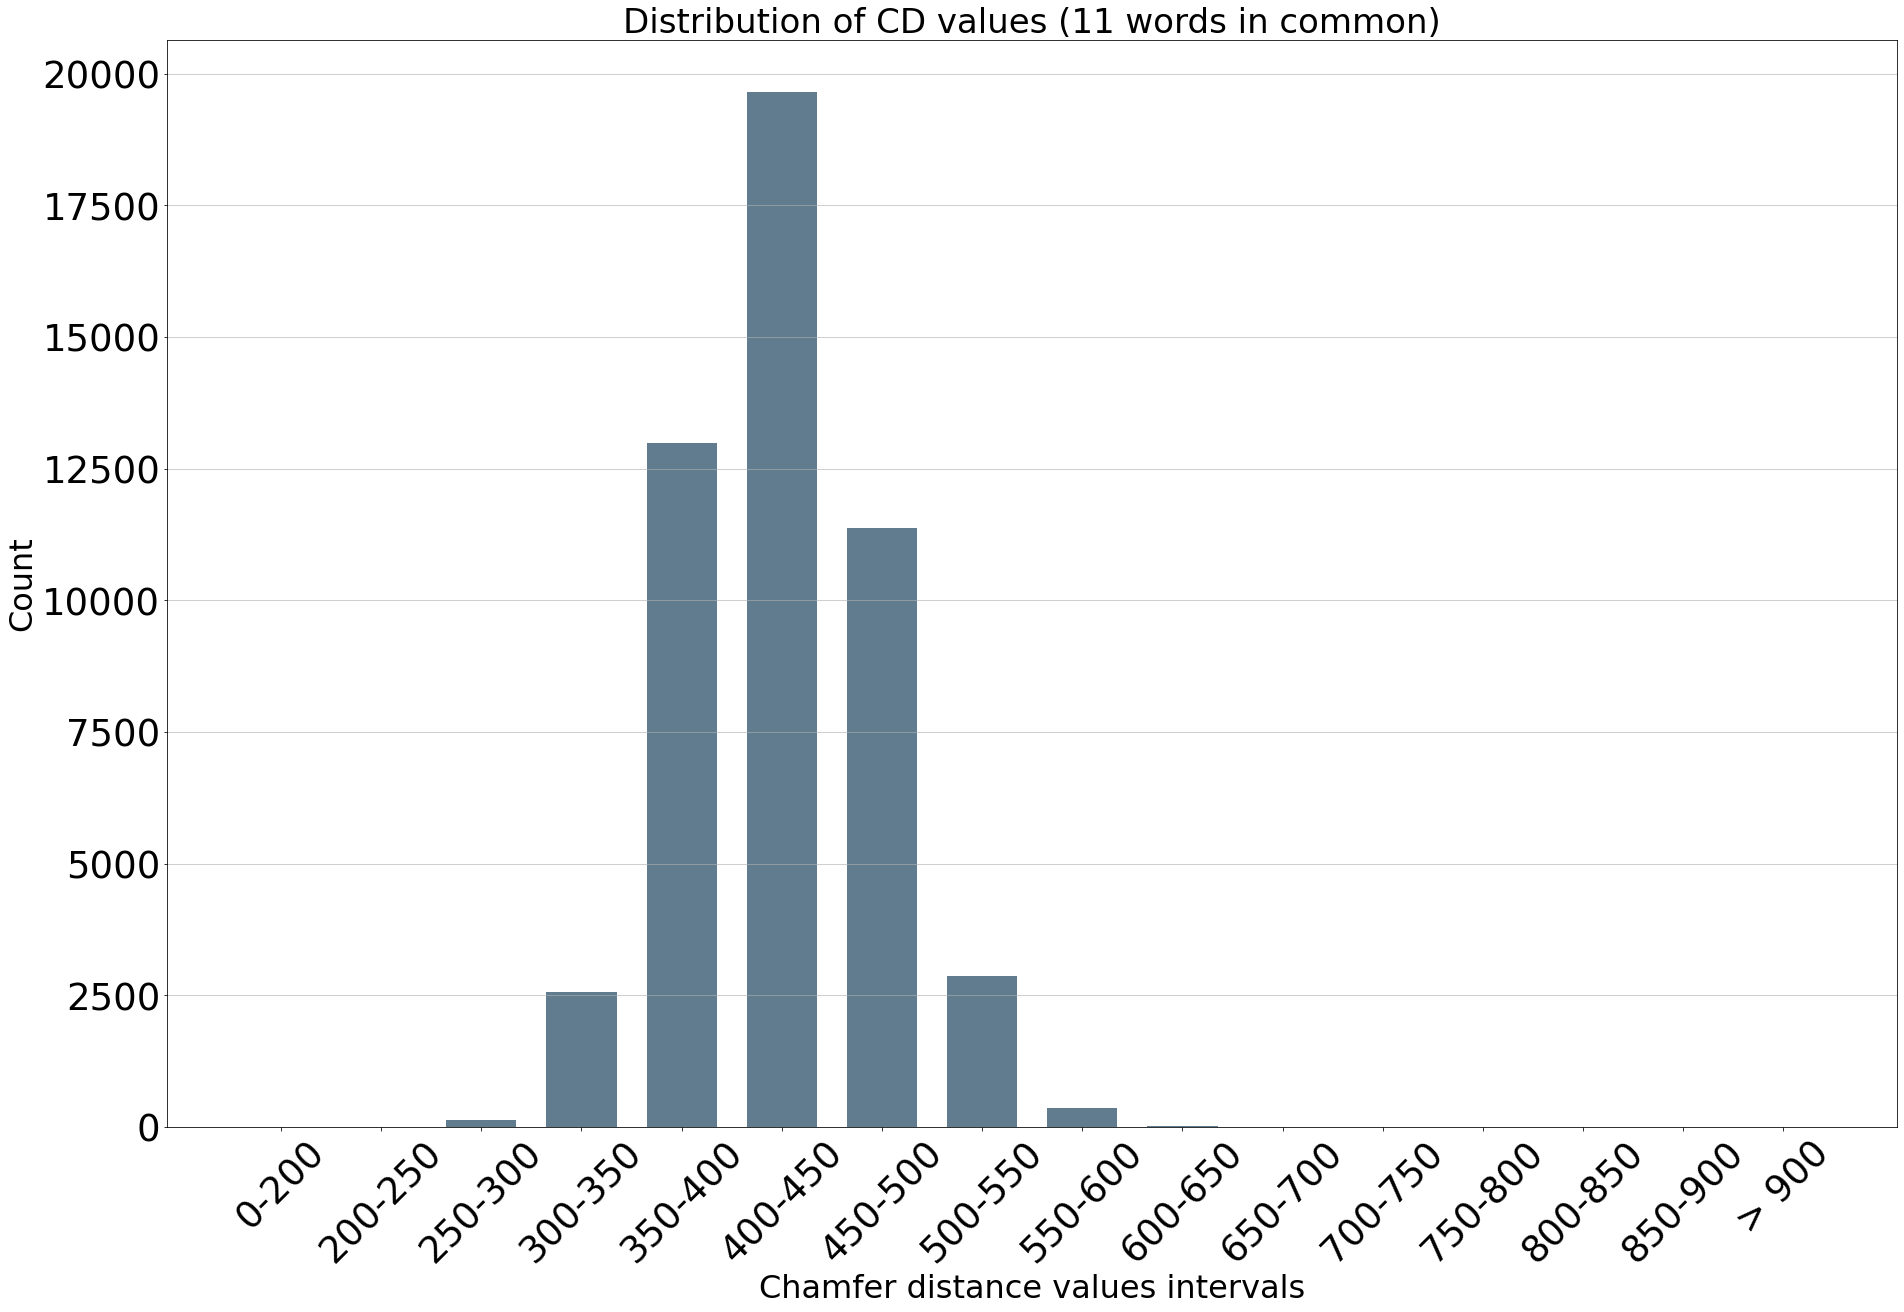

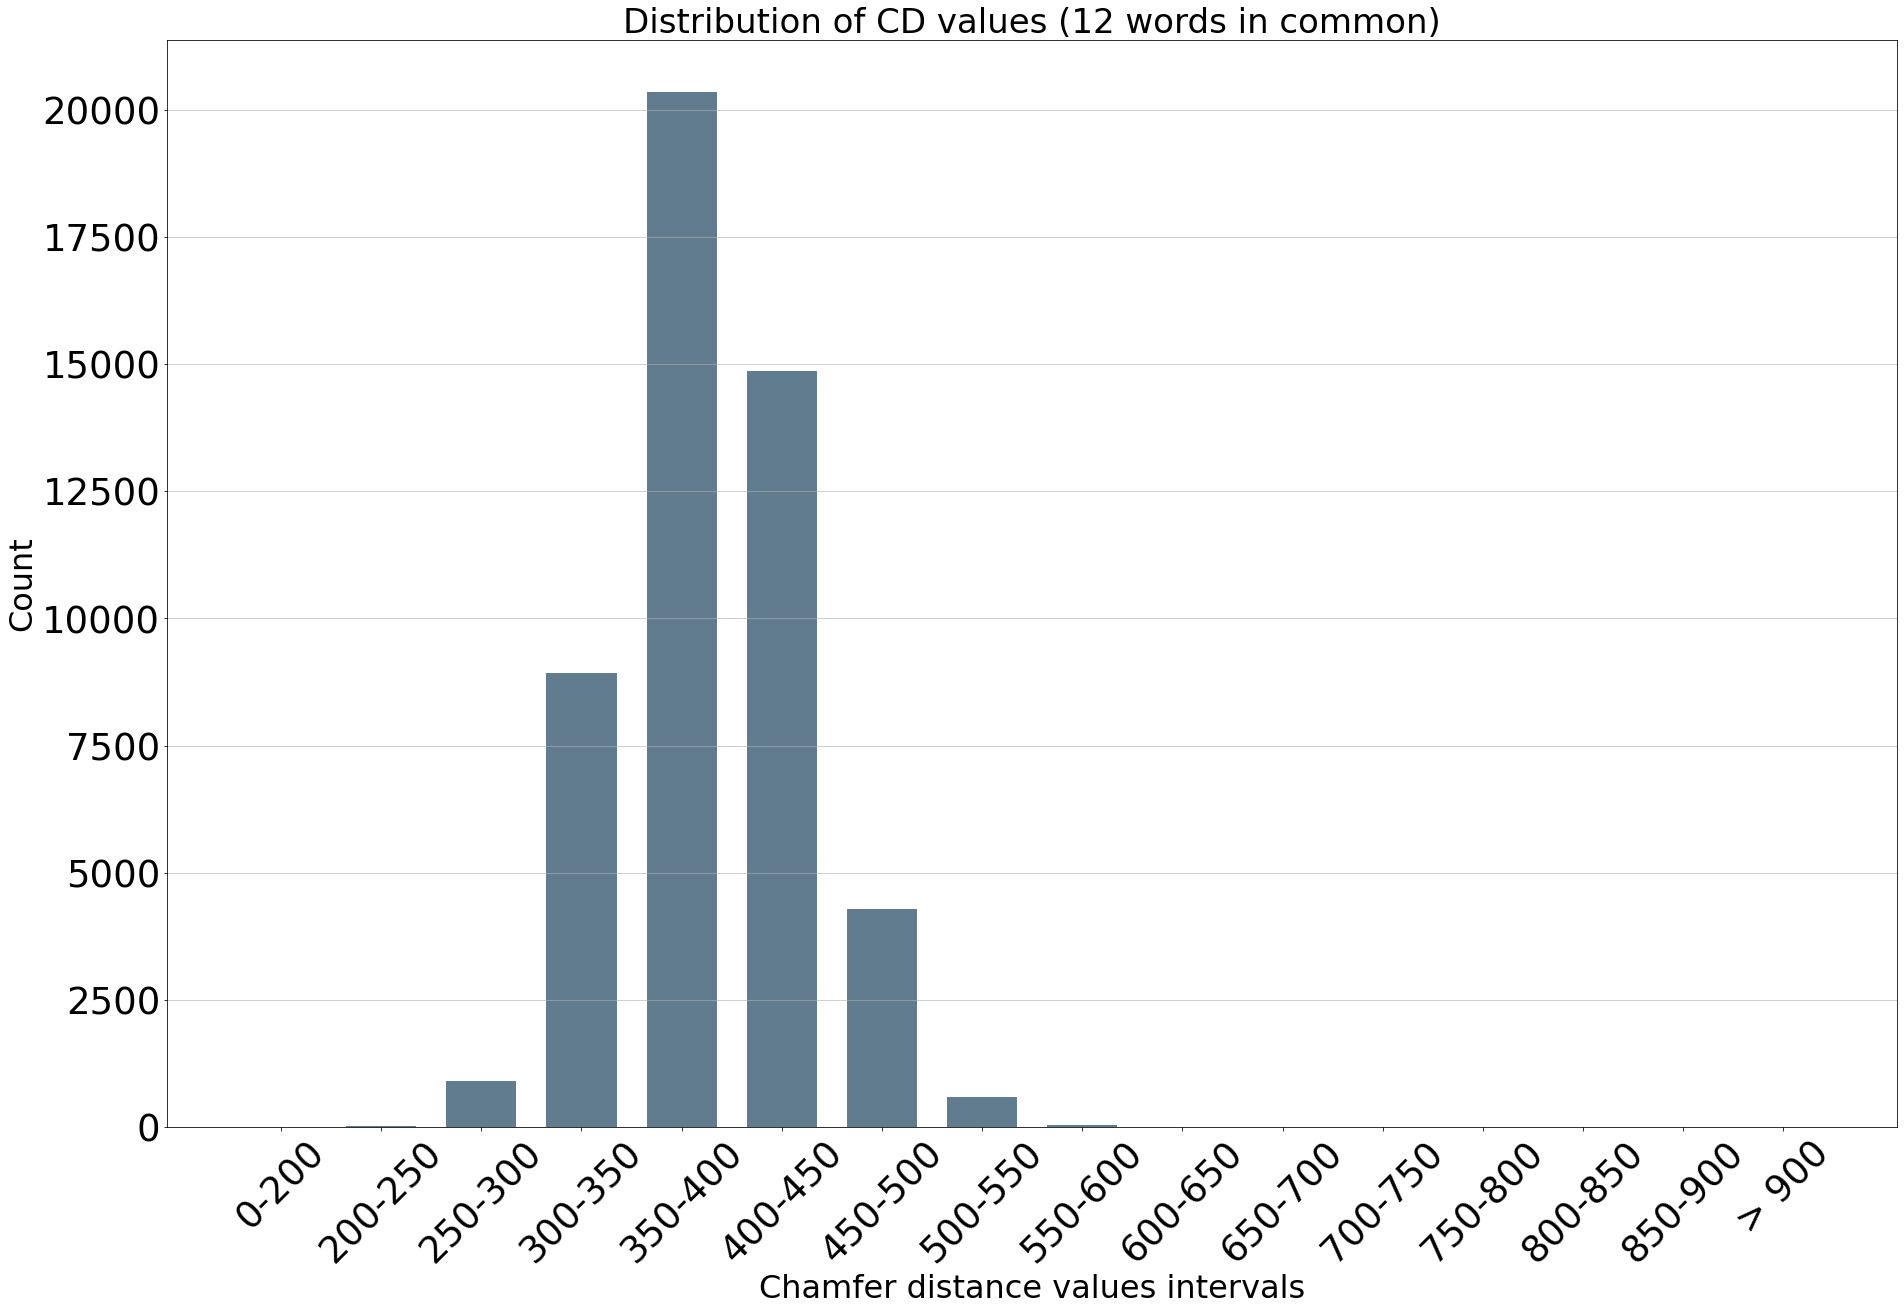

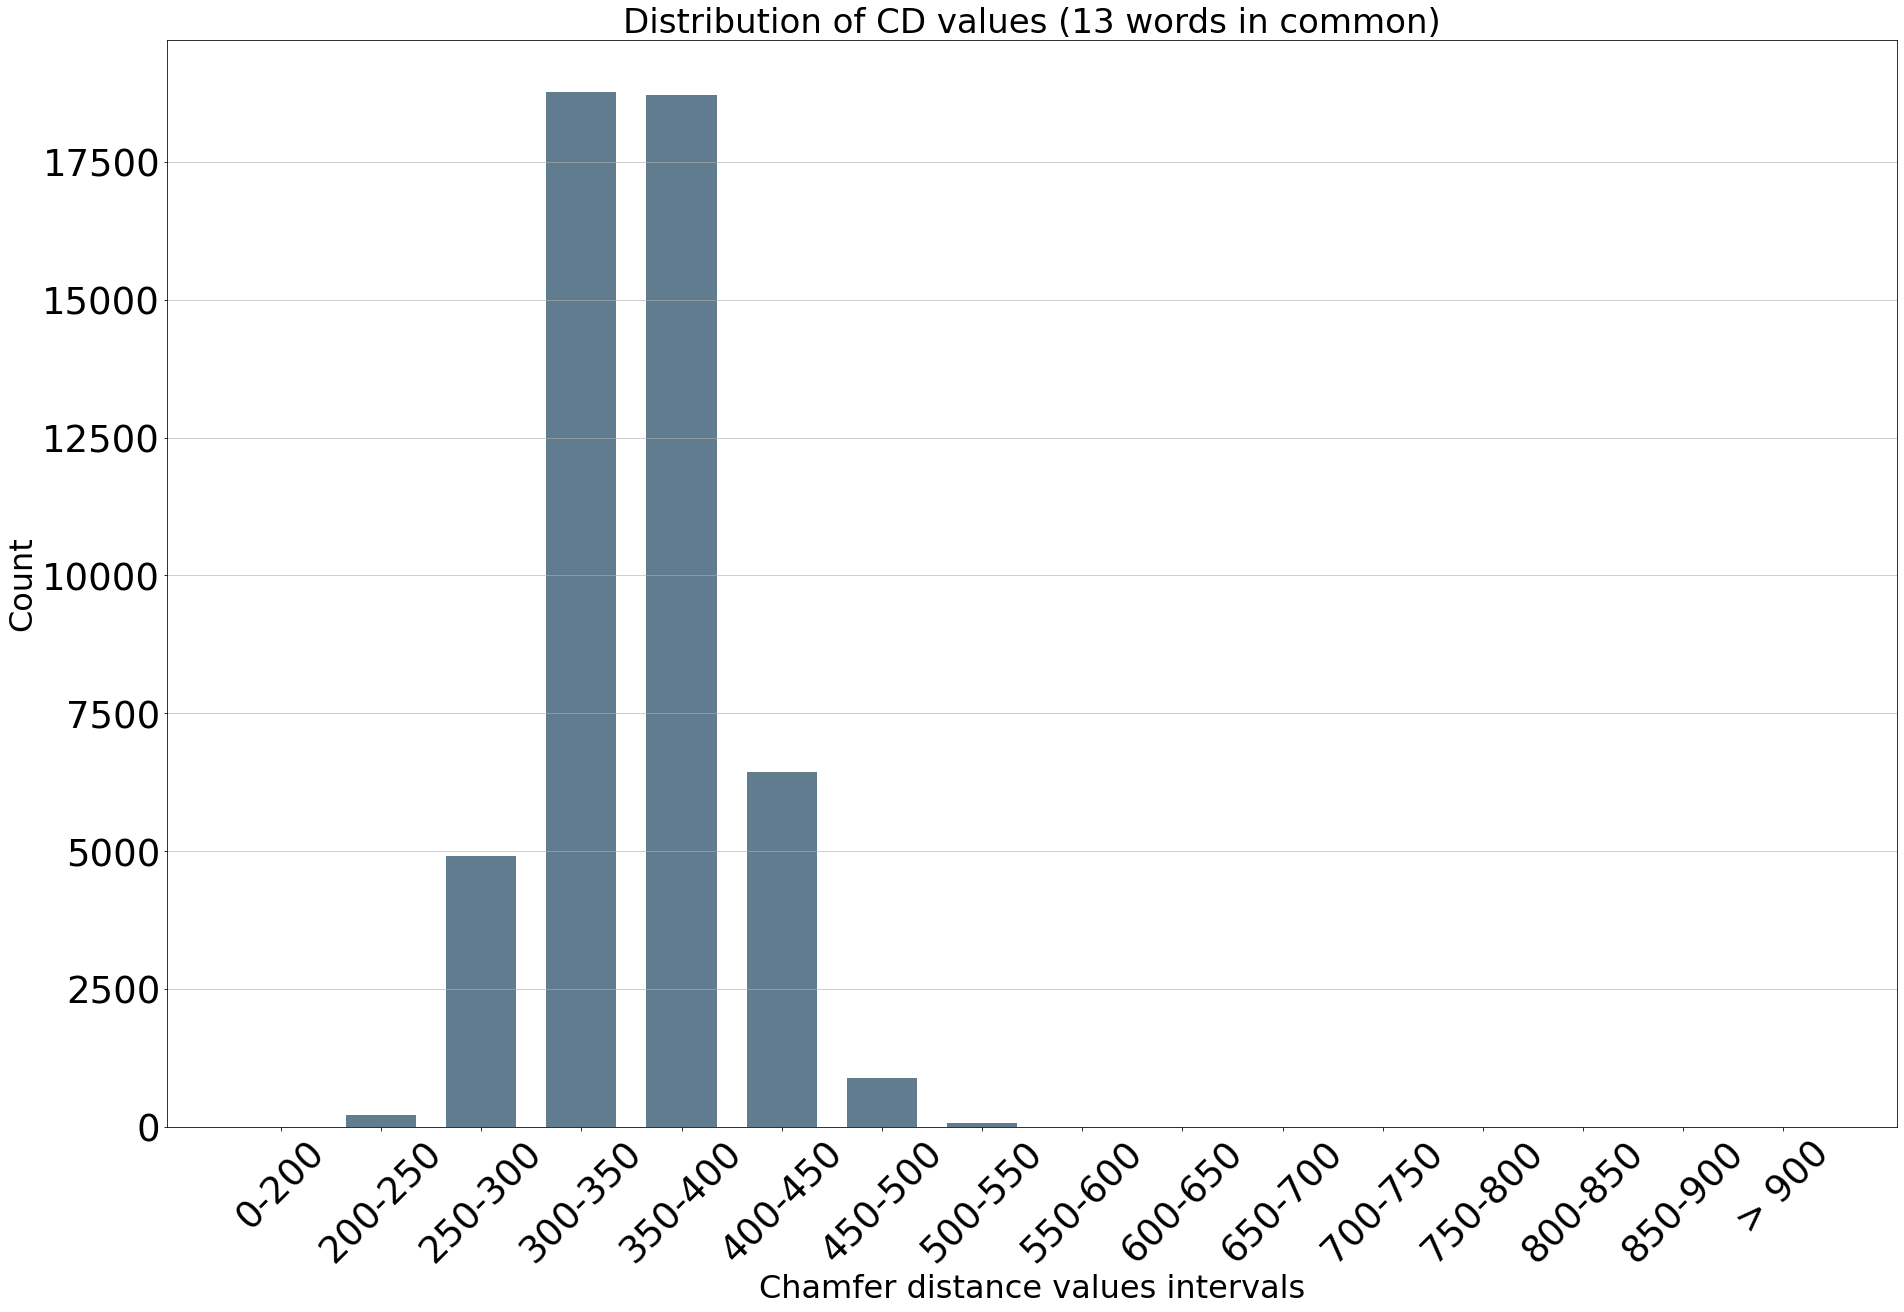

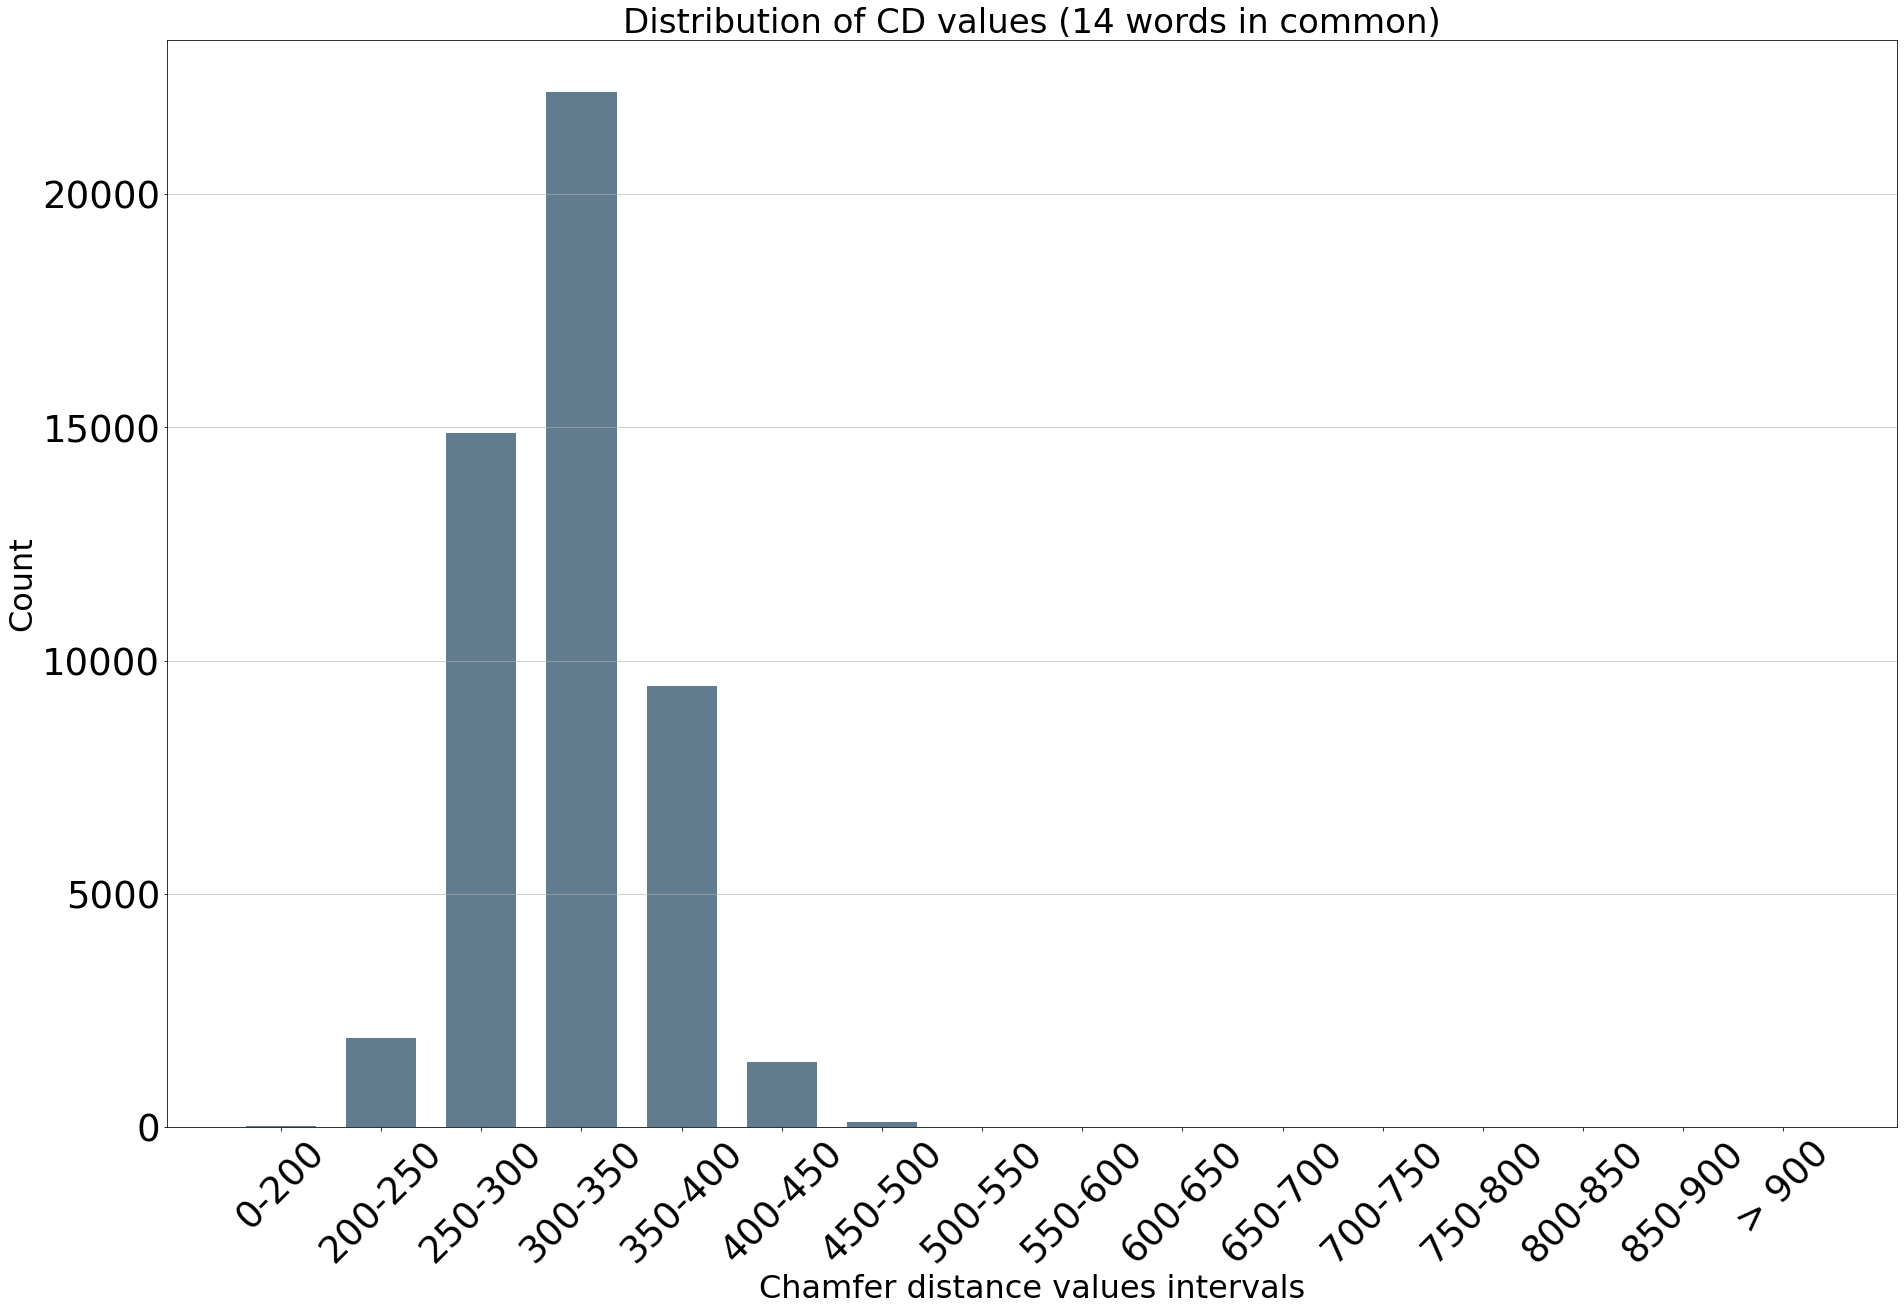

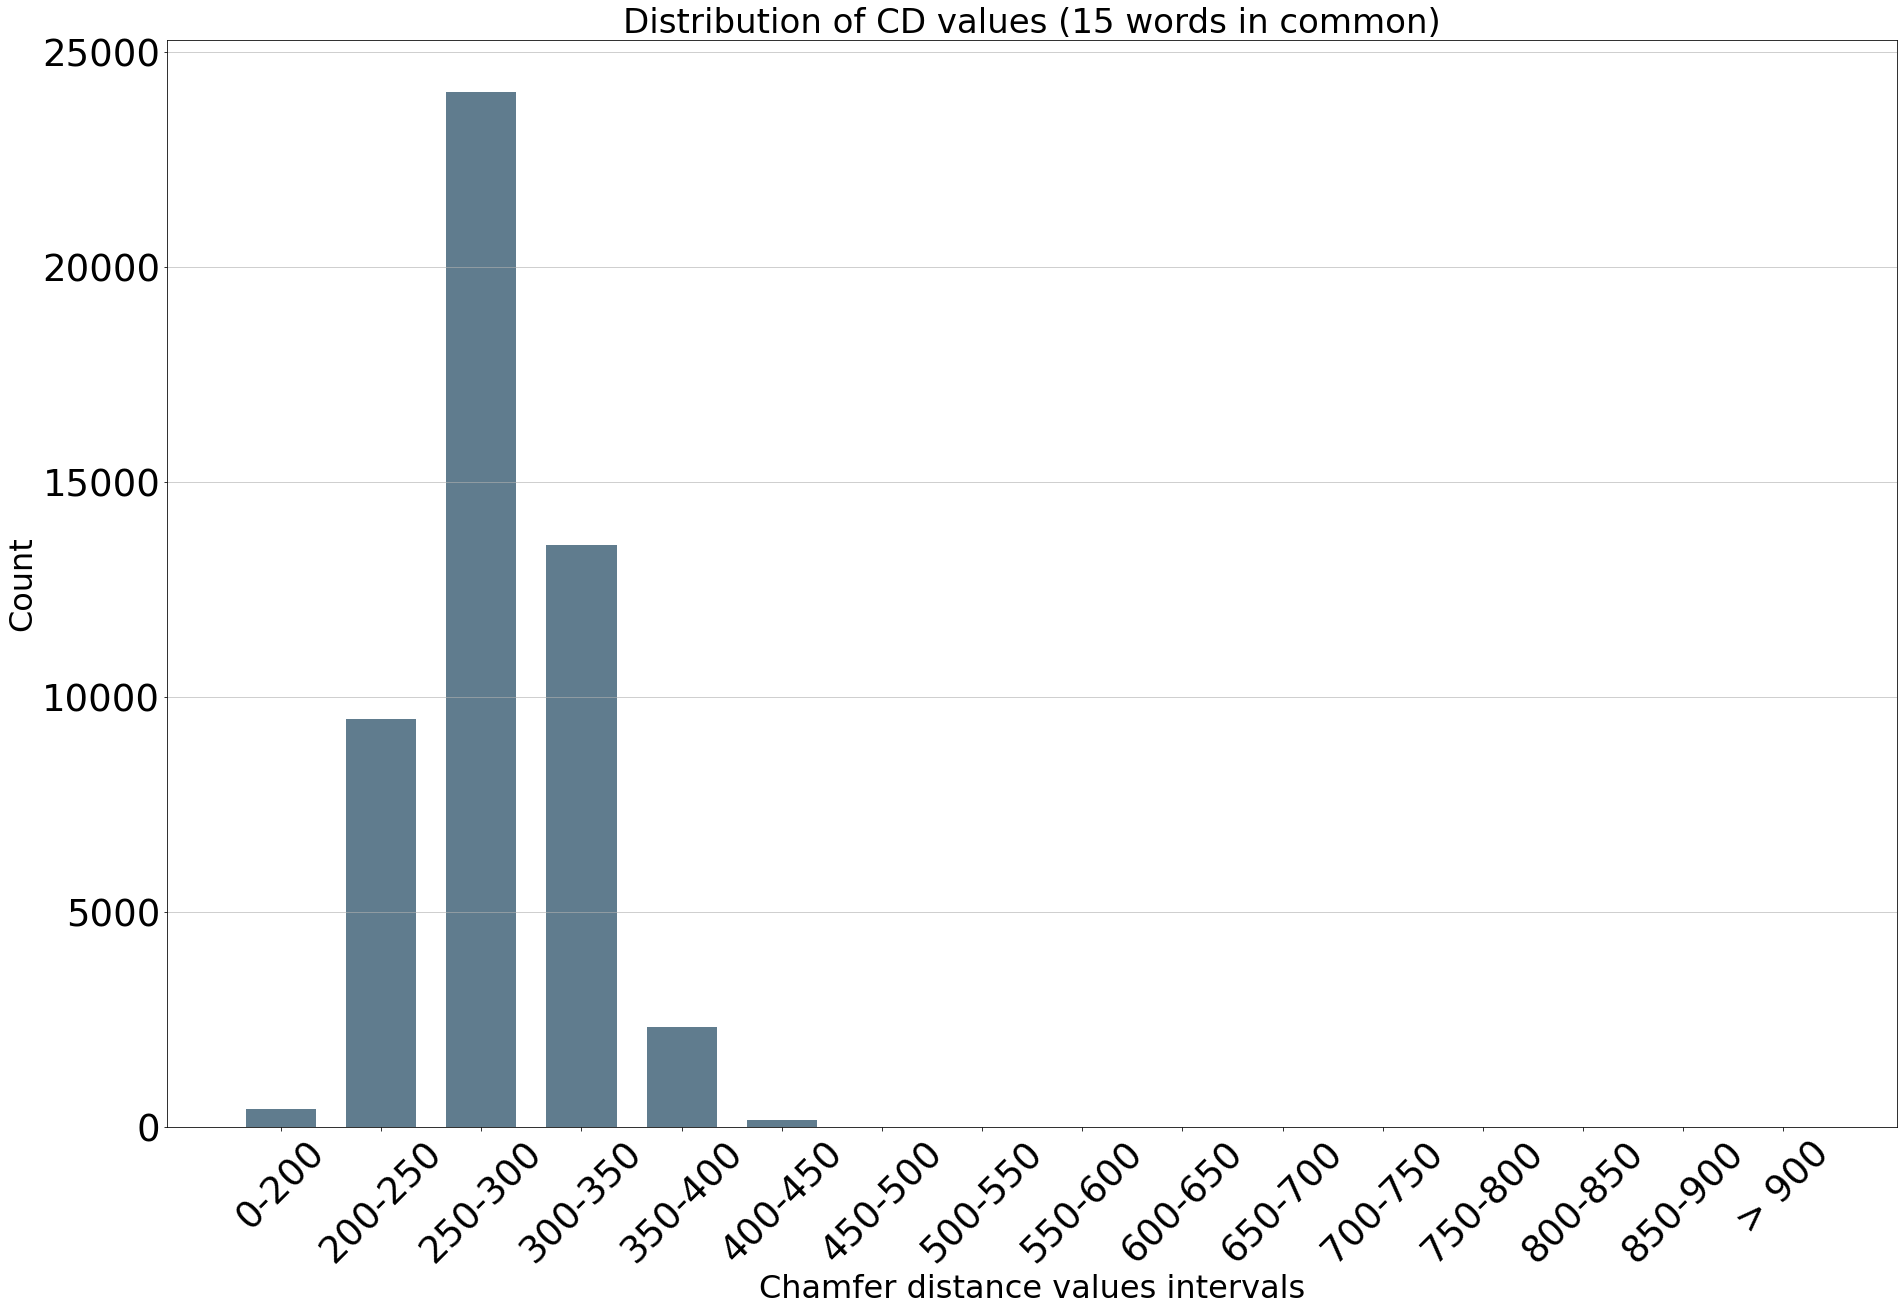

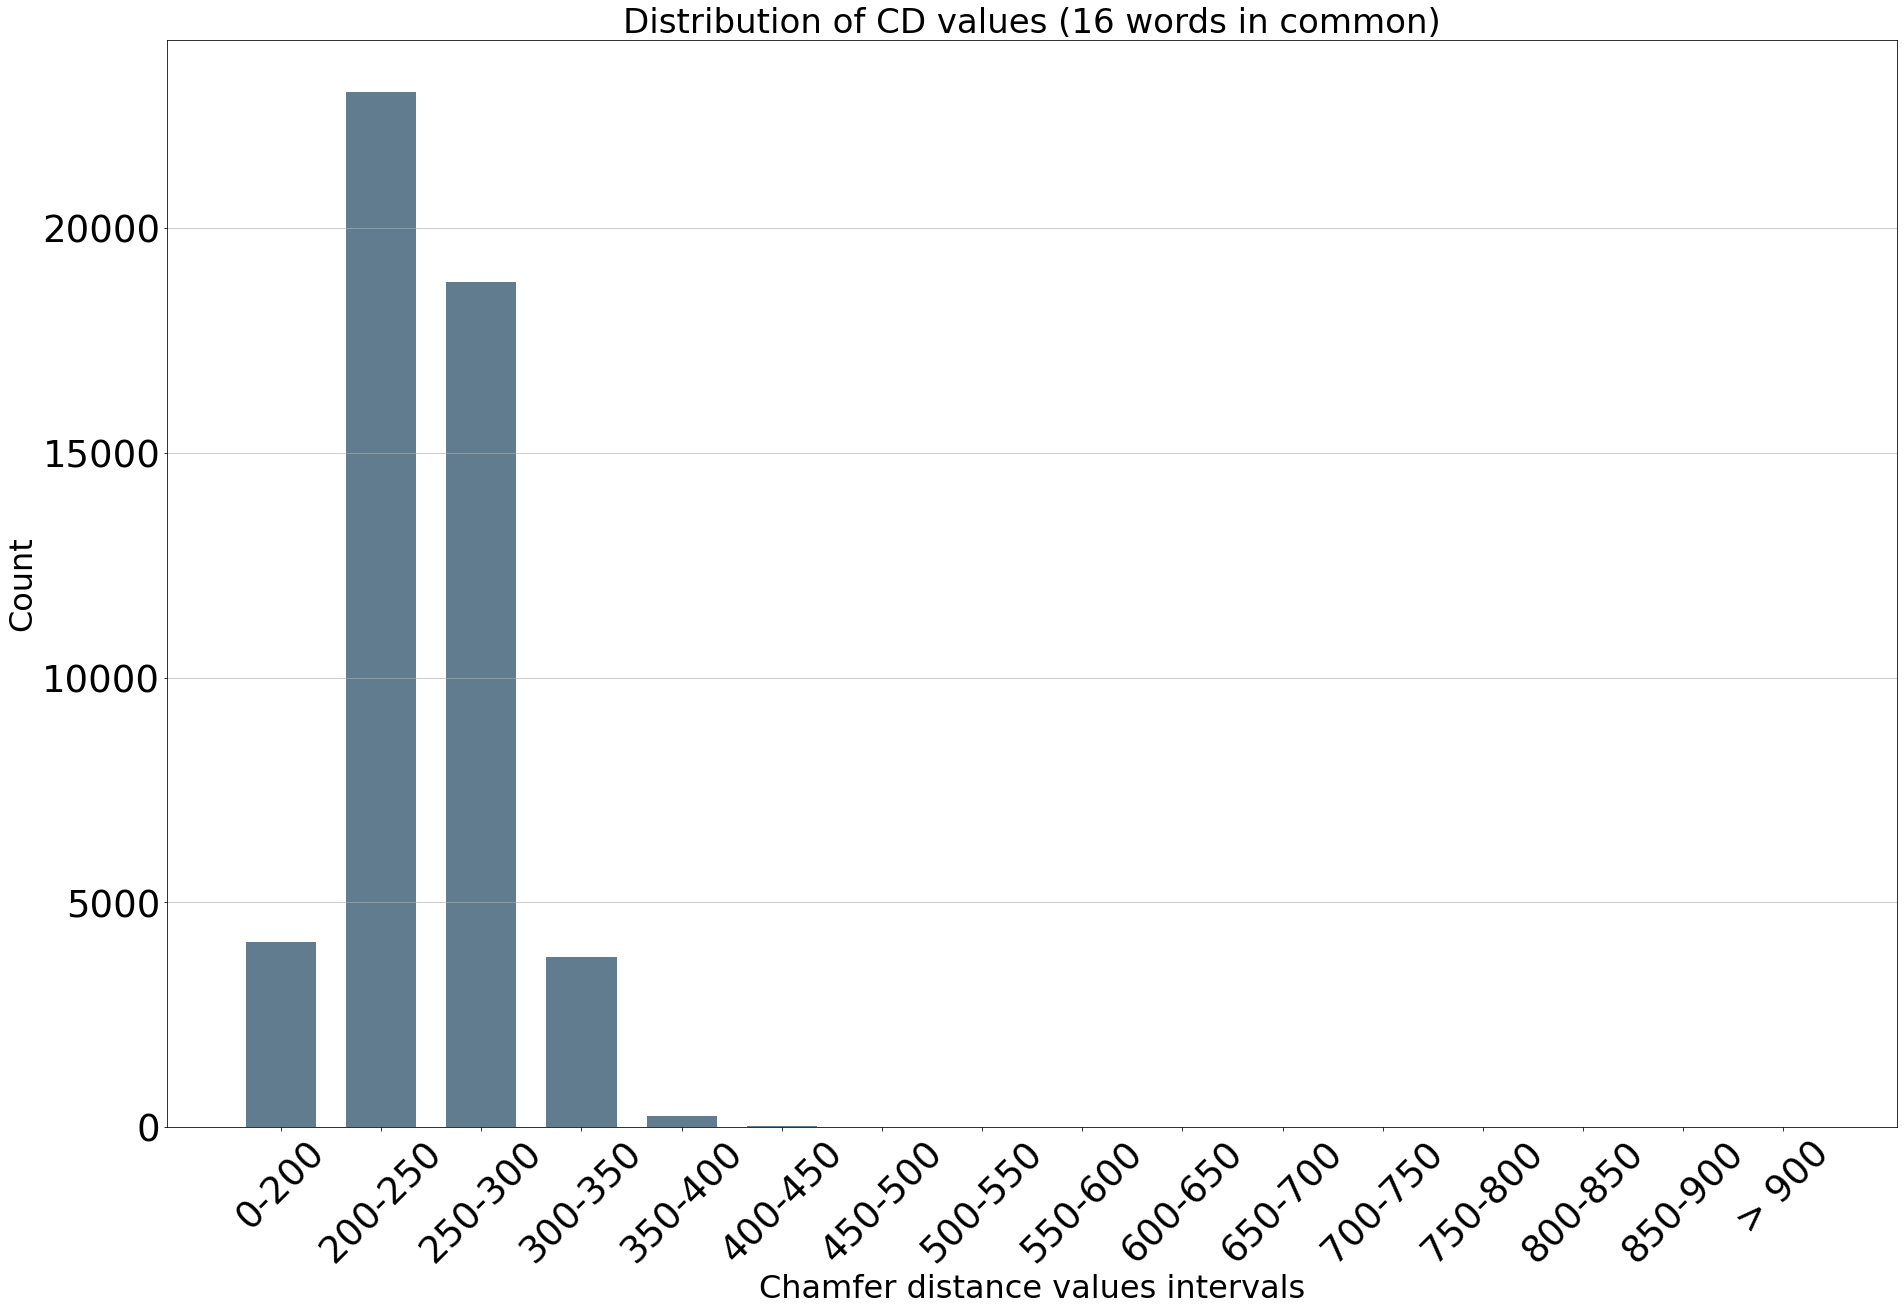

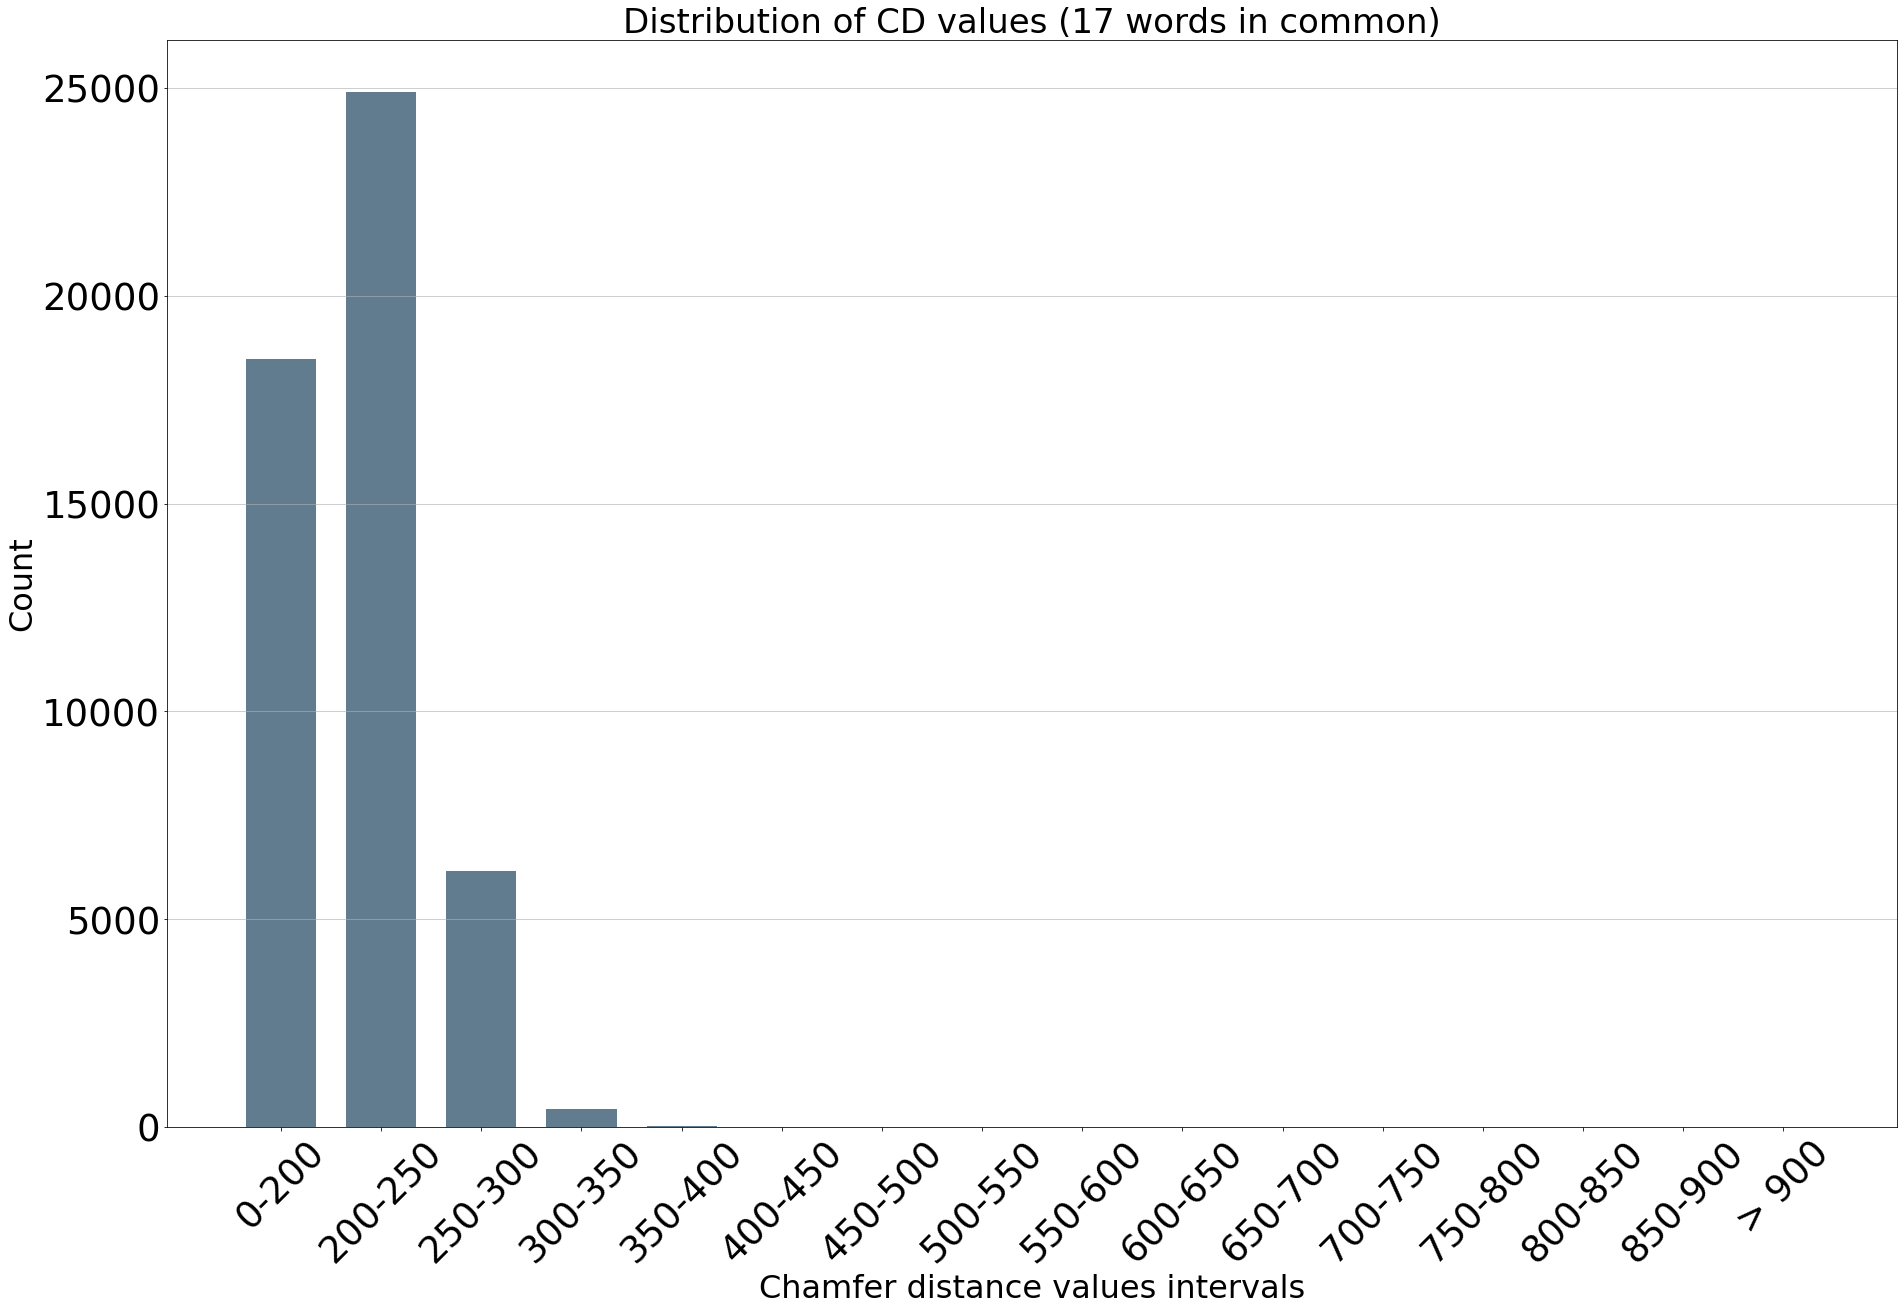

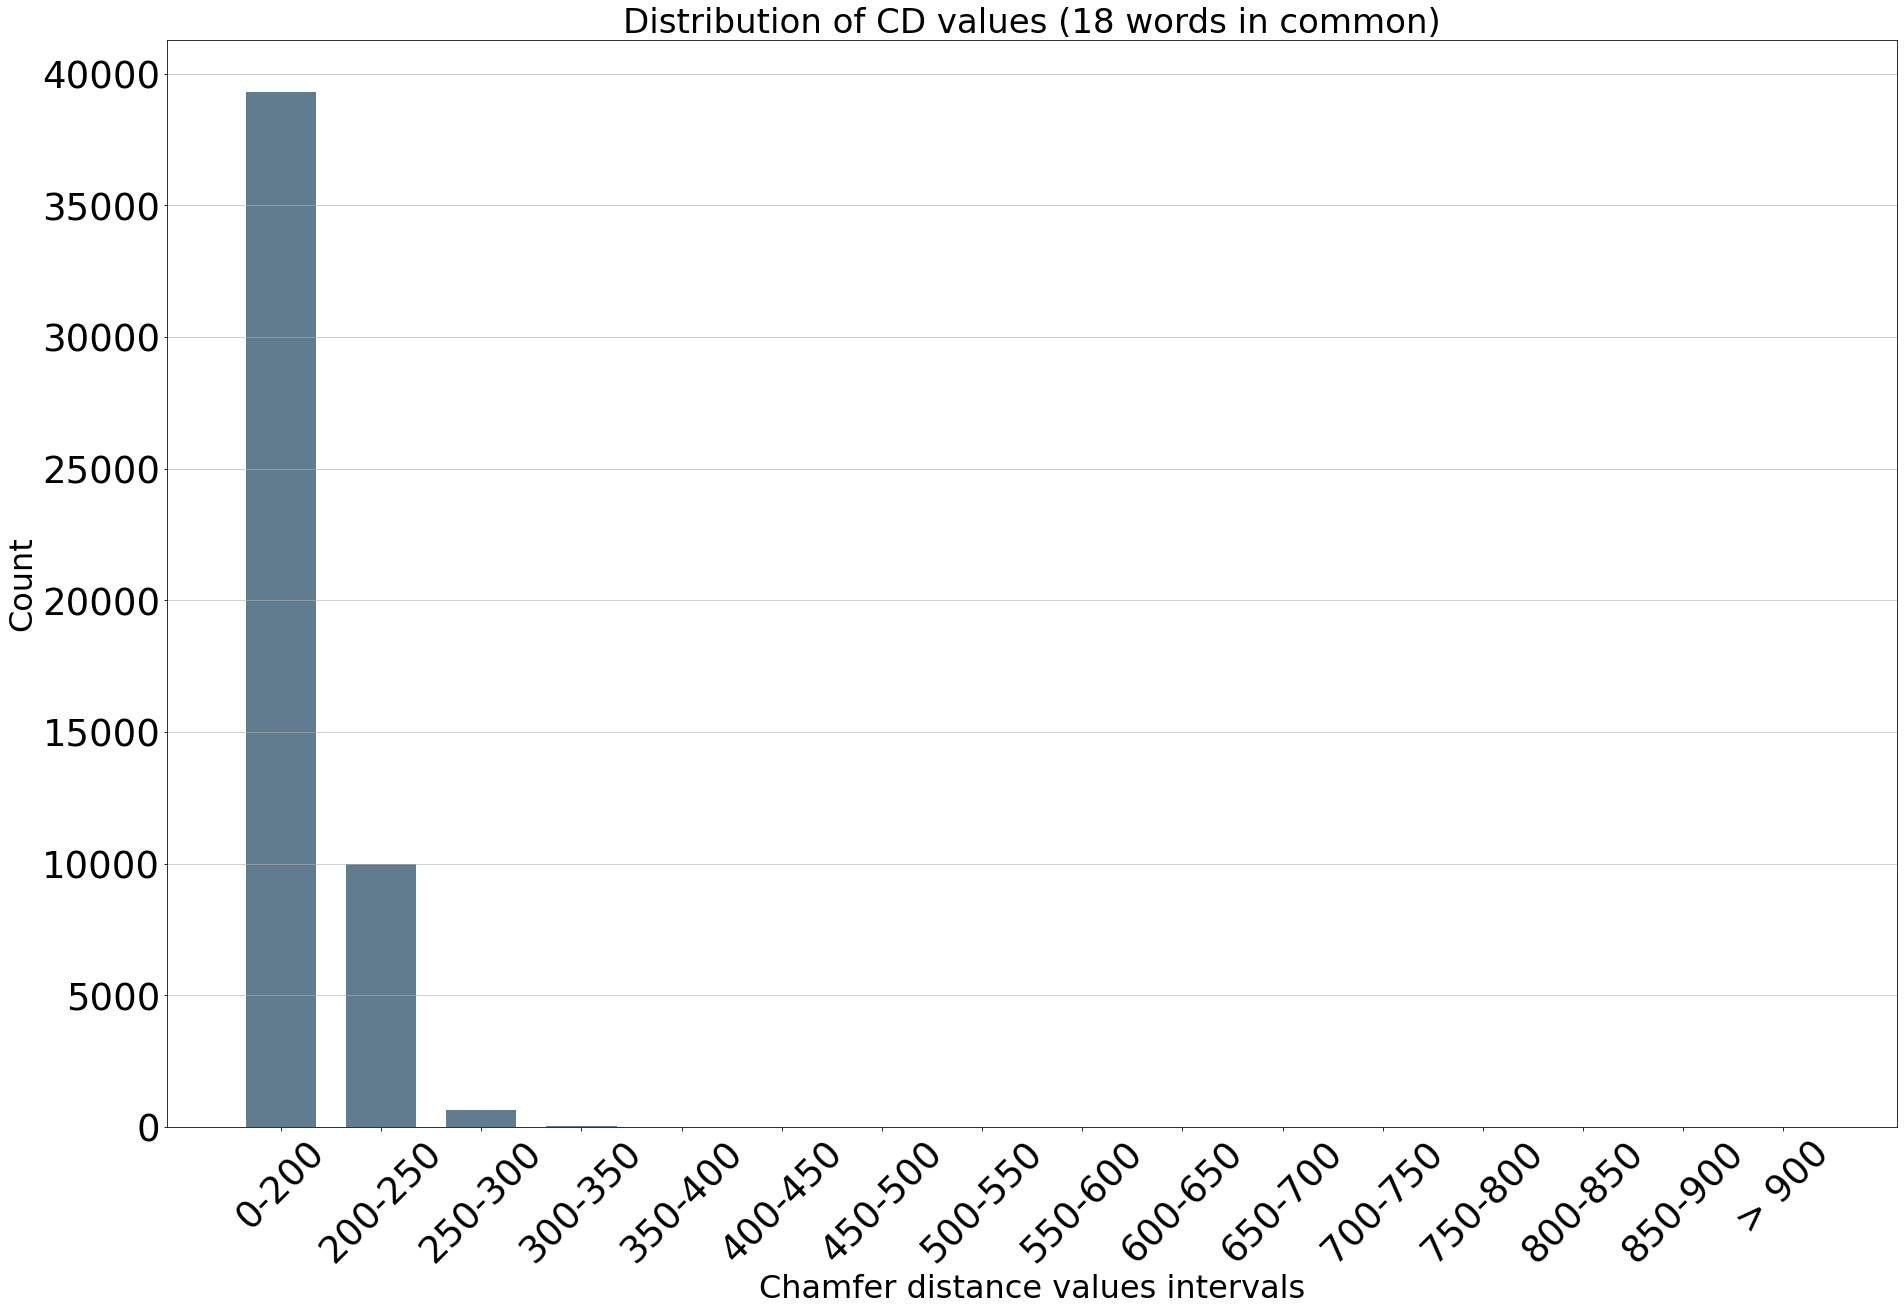

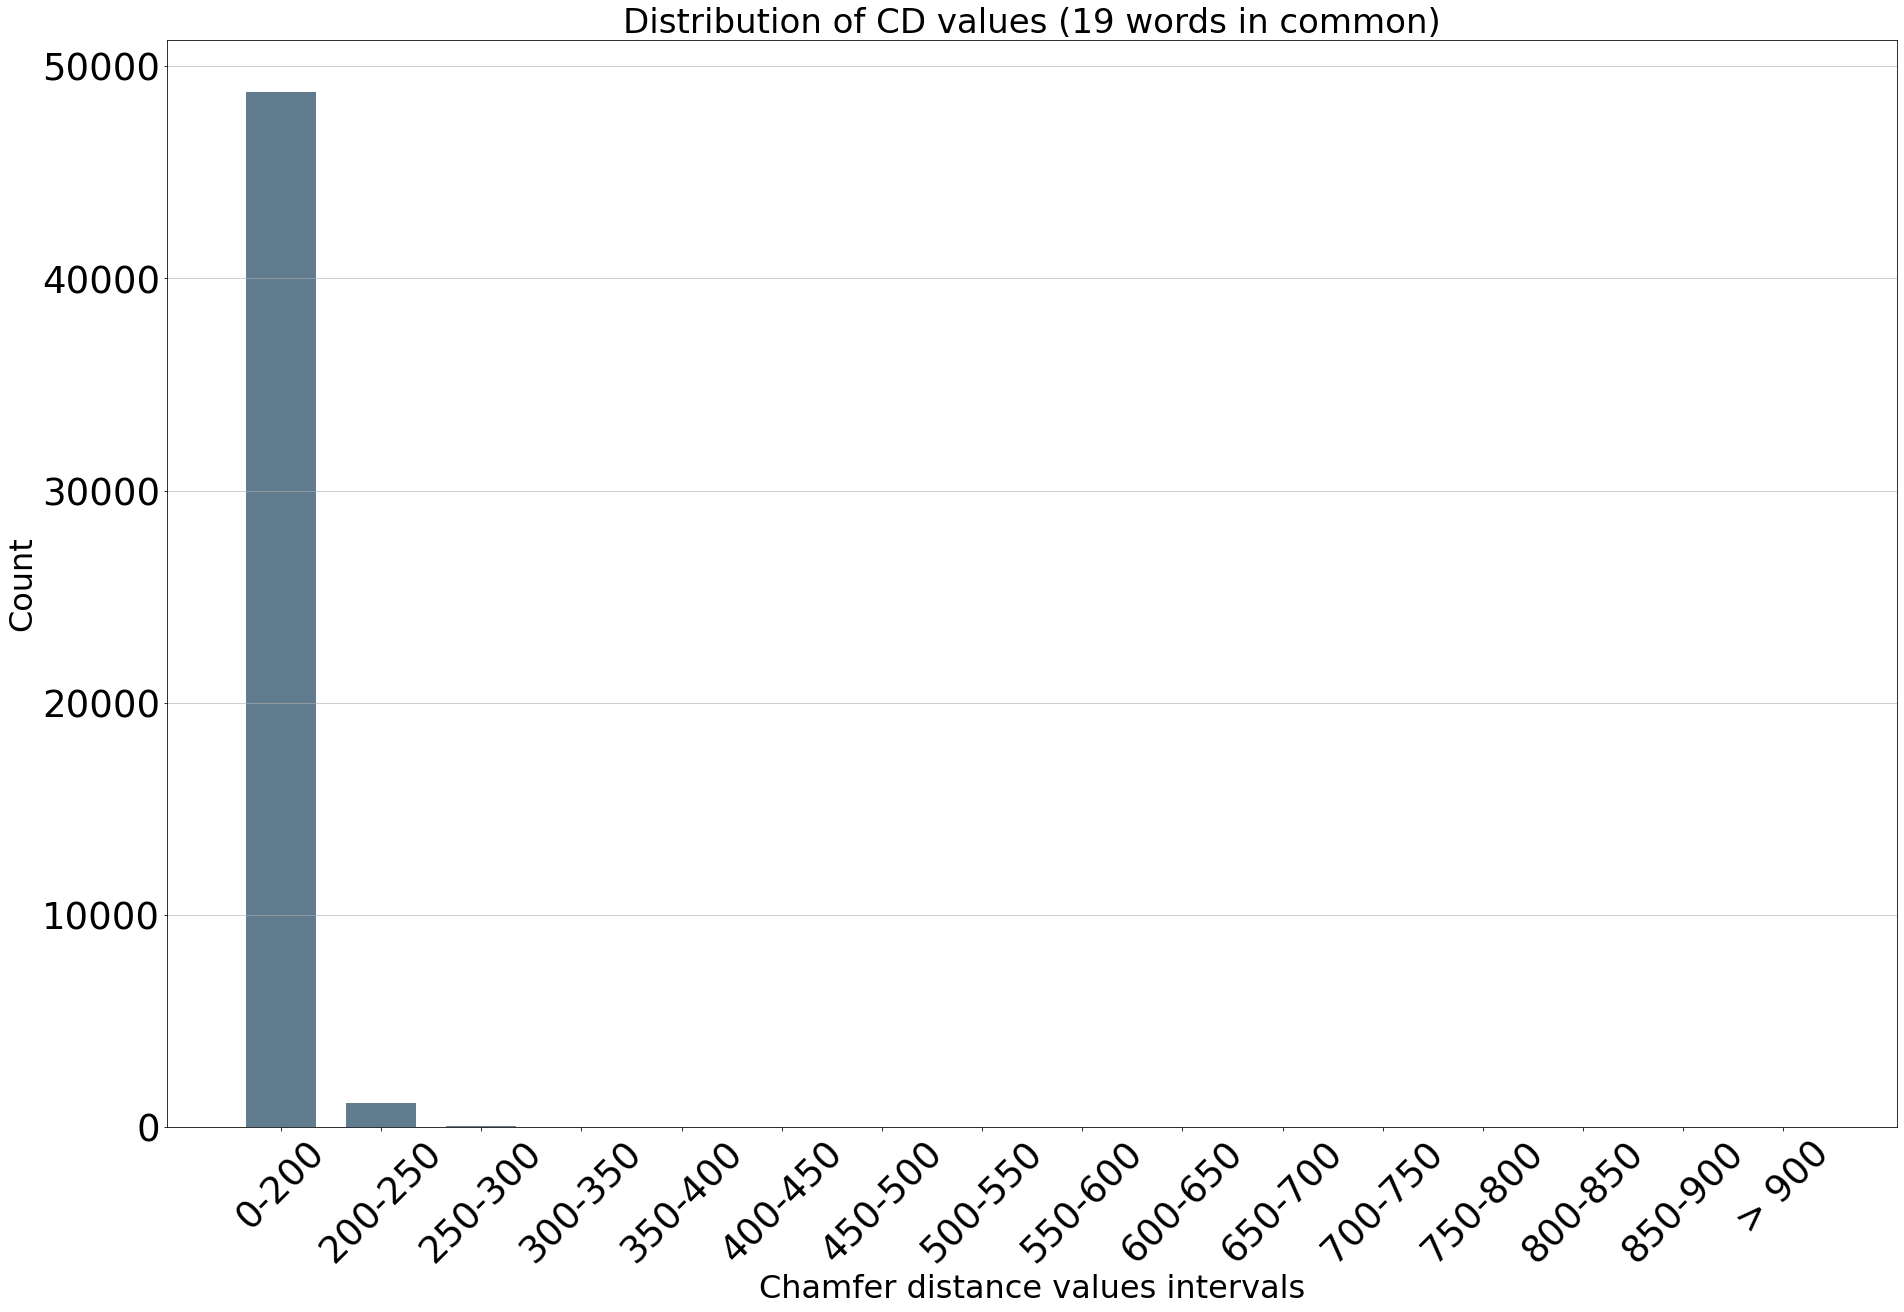

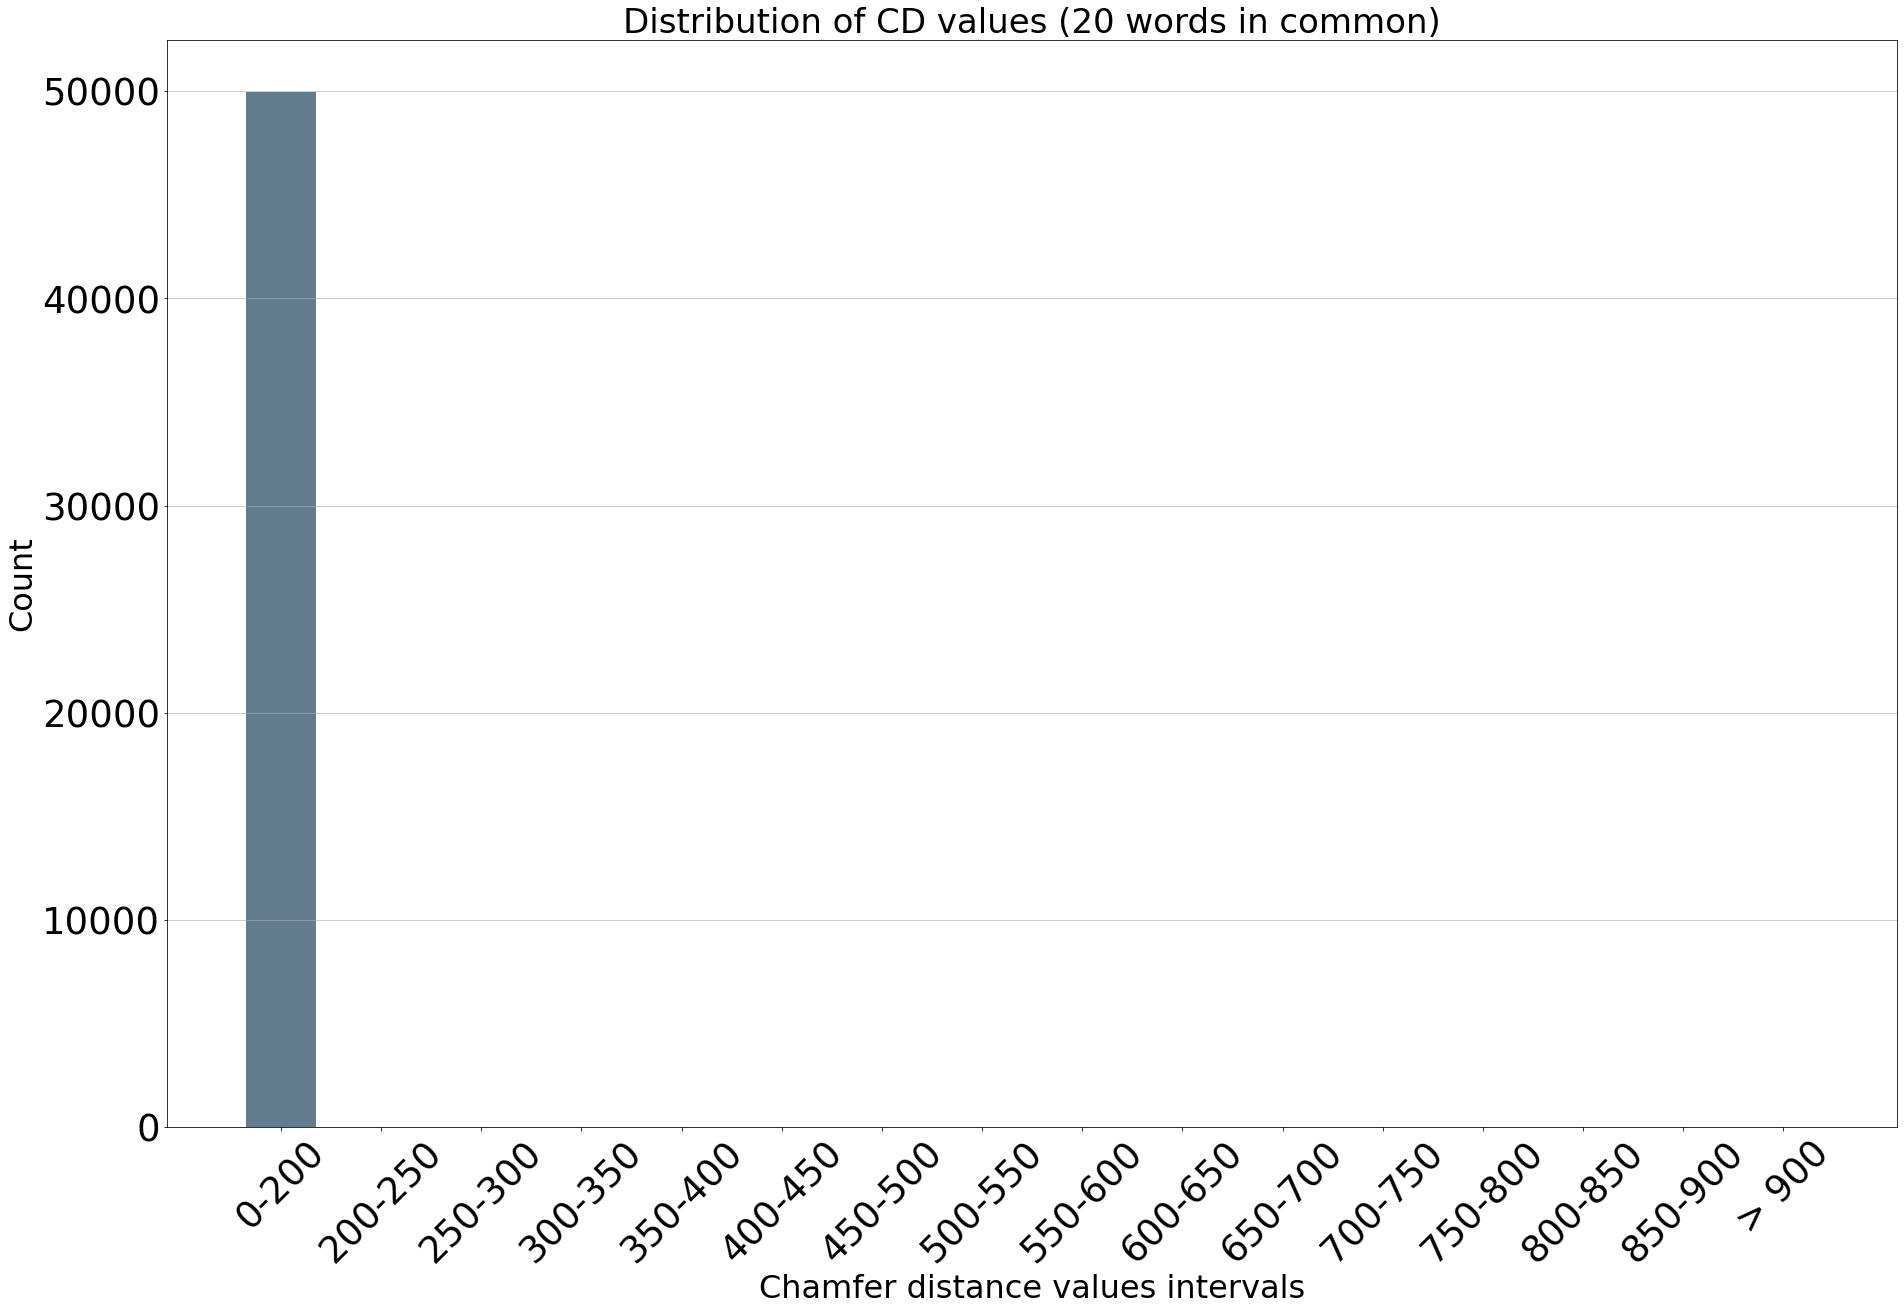

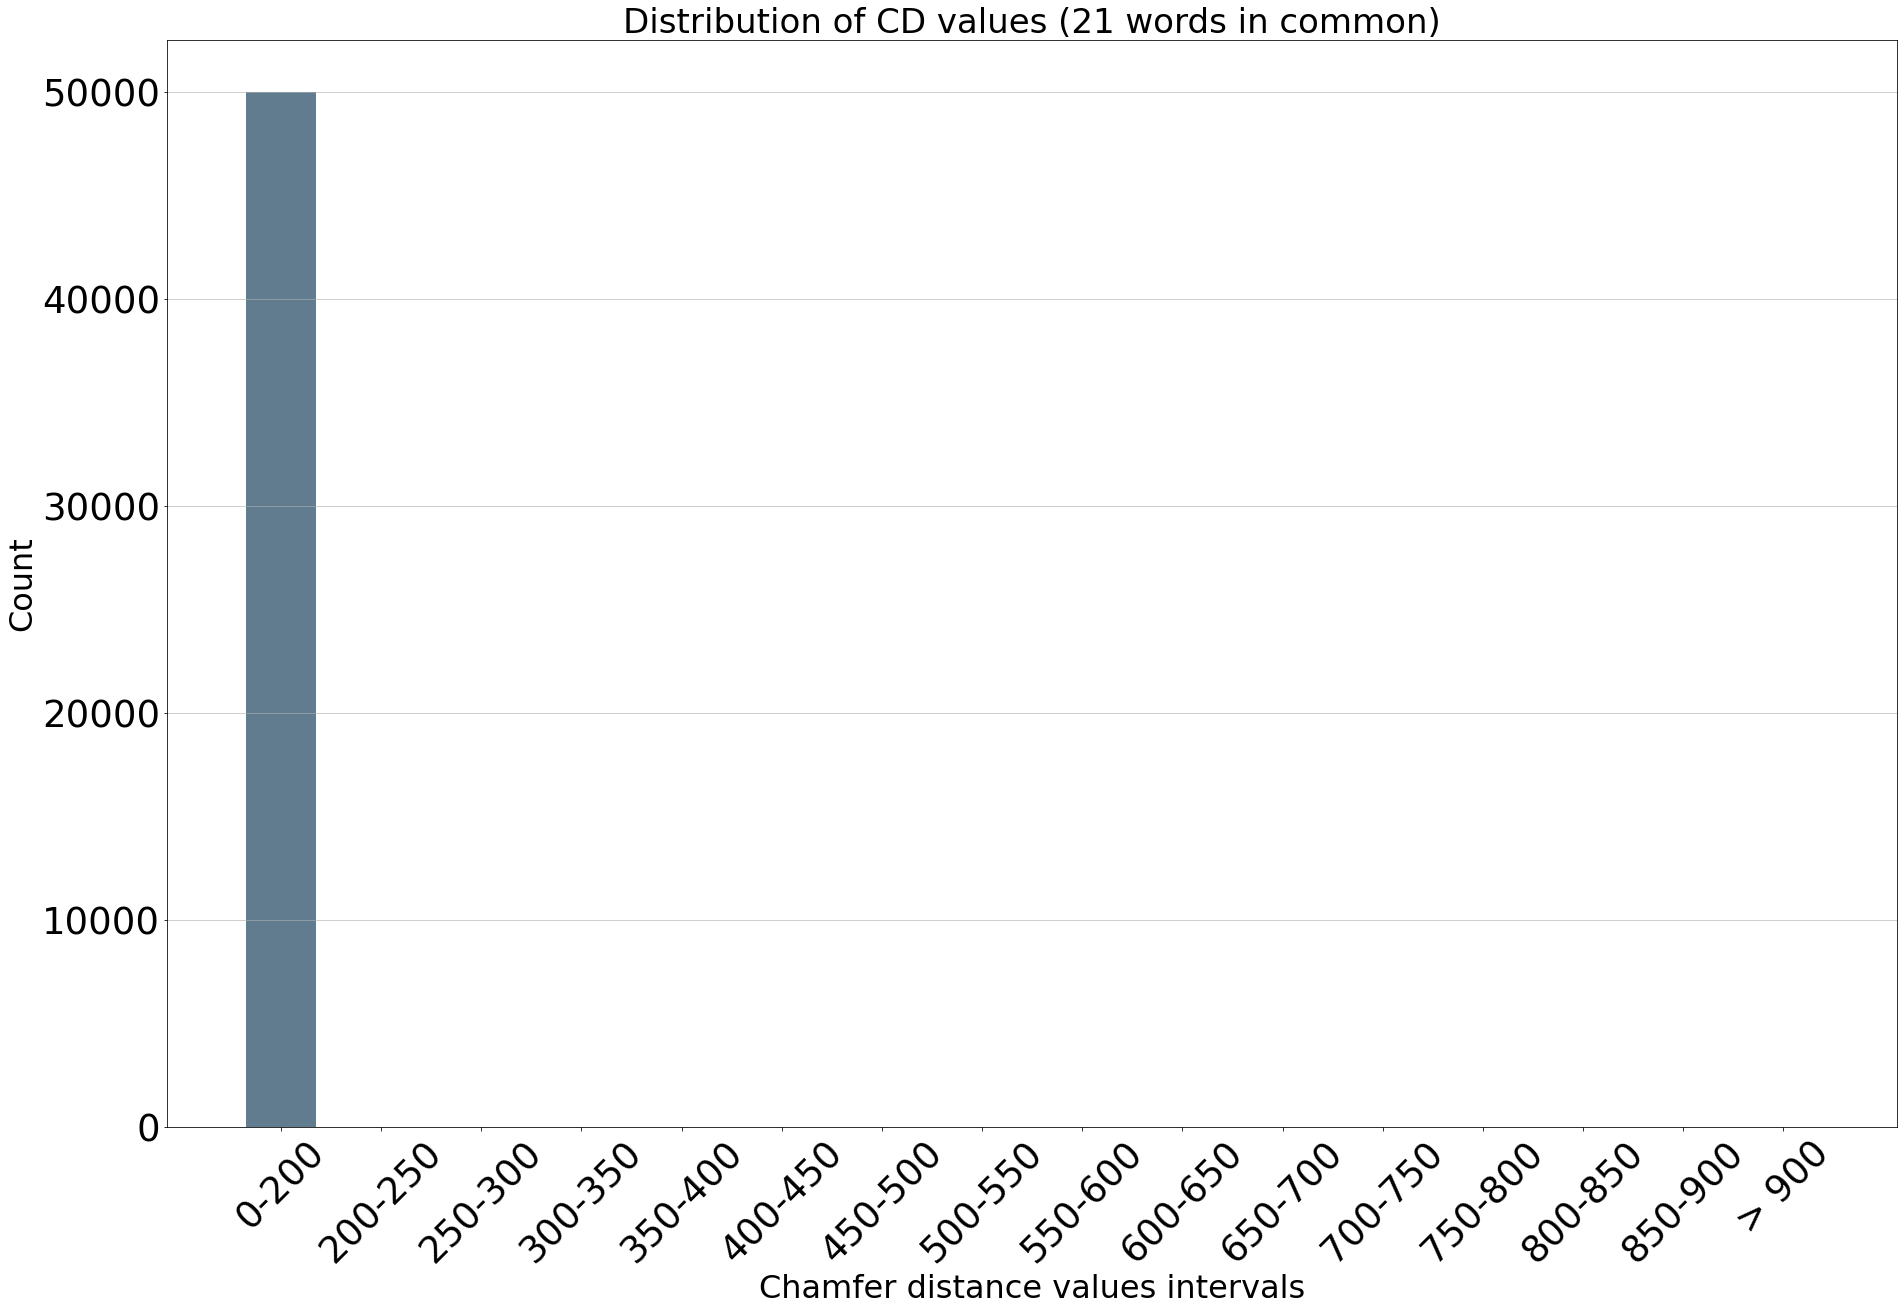

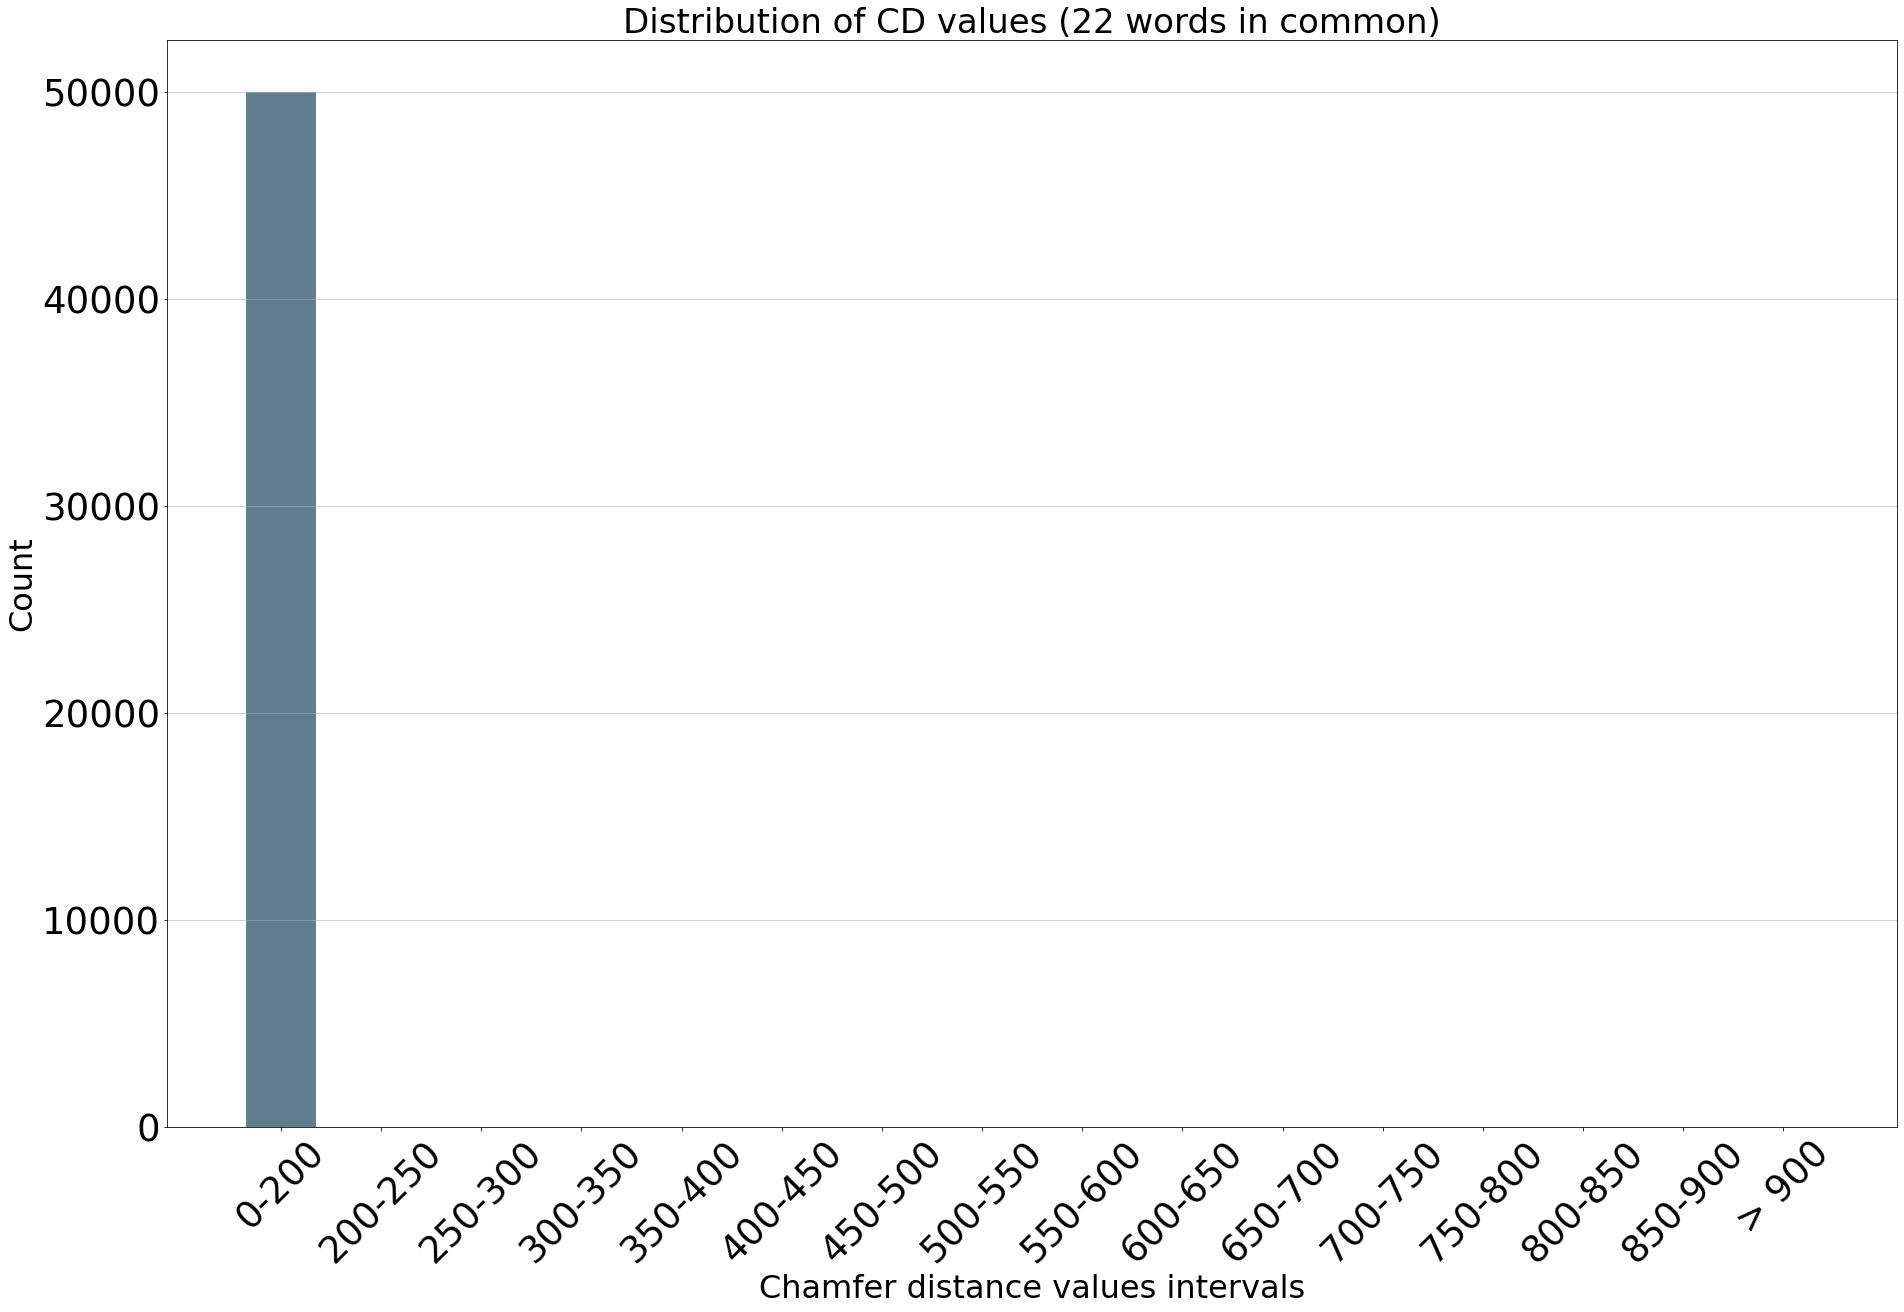

In [4]:
N = 50000 # number of samples
DISTRIBUTION = []

for l in range(22) :

  n = l+1 # number of words in common
  Distribution = []


  for j in range(N) :

    Topic0 = []
    Topic1 = []
    for i in range(n) :
      random_word = random.choice(GloVe_words)
      if random_word not in Topic0 :
        Topic0.append(random_word)
        Topic1.append(random_word)

    while len(Topic0) <= 22 :
      random_word = random.choice(GloVe_words)
      if random_word not in Topic0 :
        Topic0.append(random_word)

    while len(Topic1) <= 22 :
      random_word = random.choice(GloVe_words)
      if random_word not in Topic0 :
        if random_word not in Topic1 :
          Topic1.append(random_word)

    topic0 = [embed_dict[word] for word in Topic0]
    topic1 = [embed_dict[word] for word in Topic1]
    source_cloud = torch.as_tensor([topic0])
    target_cloud = torch.as_tensor([topic1])
    dist_forward = chamferDist(source_cloud, target_cloud)
    Distribution.append(dist_forward.detach().cpu().item())

  DISTRIBUTION.append(Distribution)

  ##################################
  # counting
  ##################################

  x = ['0-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-550', '550-600', '600-650', '650-700','700-750','750-800','800-850', '850-900', '> 900']
  height = []

  count = 0
  for k in Distribution :
    if k < 200 :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 200) & (k < 250) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 250) & (k < 300) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 300) & (k < 350) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 350) & (k < 400) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 400) & (k < 450) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 450) & (k < 500) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 500) & (k < 550) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 550) & (k < 600) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 600) & (k < 650) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 650) & (k < 700) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 700) & (k < 750) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 750) & (k < 800) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 800) & (k < 850) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if (k >= 850) & (k < 900) :
      count+=1
  height.append(count)

  count = 0
  for k in Distribution :
    if k>=900 :
      count+=1
  height.append(count)

  ##################################
  # Plot
  ##################################

  plt.figure(figsize = (31,20))
  plt.bar(x, height, color='#607c8e', width = 0.7, label='Distributiion for 10 words in common')

  plt.title(f'Distribution of CD values ({n} words in common)', size = 34)
  plt.xlabel('Chamfer distance values intervals', size = 32)
  plt.ylabel('Count', size = 32)
  plt.xticks(size = 37, rotation=45)
  plt.yticks(size = 37)
  plt.grid(axis='y', alpha=0.75)
  #plt.legend()
  plt.show()



# Graph of the average CD value w.r.t. $N$

In [6]:
N = 50000 #number of samples
Distribution0 = []
for j in range(N) :
  Topic0 = []
  Topic1 = []
  while len(Topic0) <= 22 :
    random_word = random.choice(GloVe_words)
    if random_word not in Topic0 :
      Topic0.append(random_word)

  while len(Topic1) <= 22 :
    random_word = random.choice(GloVe_words)
    if random_word not in Topic0 :
      if random_word not in Topic1 :
        Topic1.append(random_word)

  topic0 = [embed_dict[word] for word in Topic0]
  topic1 = [embed_dict[word] for word in Topic1]
  source_cloud = torch.as_tensor([topic0])
  target_cloud = torch.as_tensor([topic1])
  dist_forward = chamferDist(source_cloud, target_cloud)
  Distribution0.append(dist_forward.detach().cpu().item())

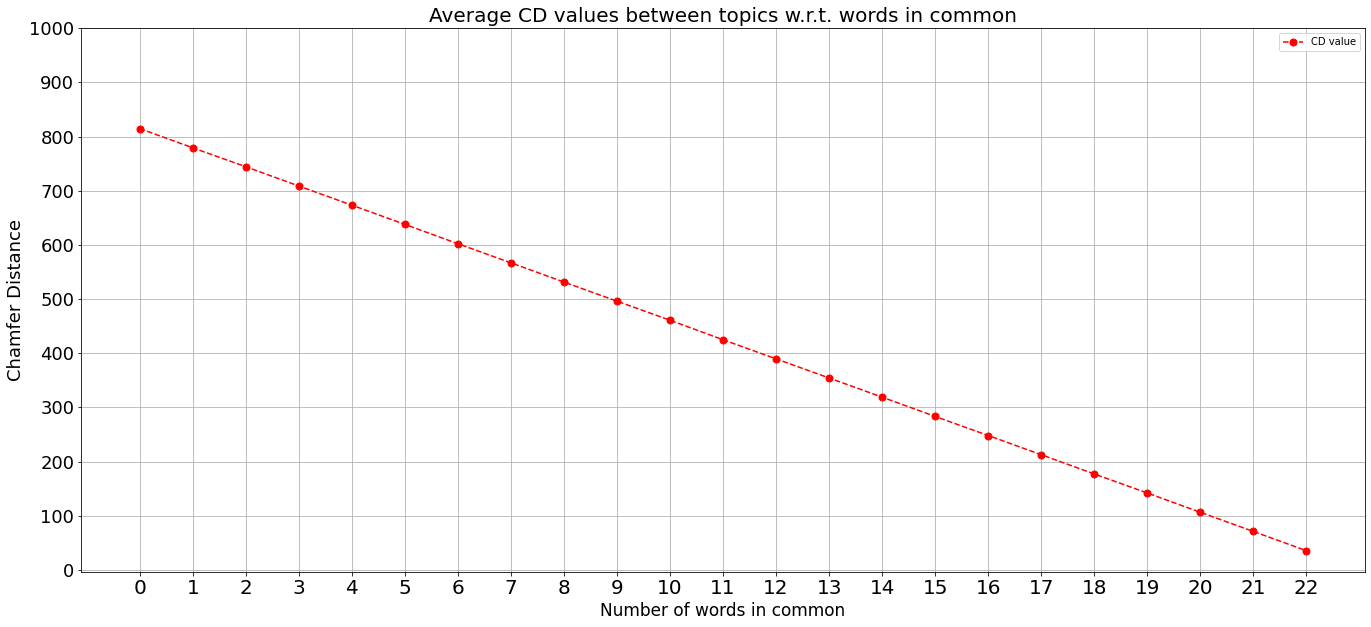

In [7]:
nb_words = [i for i in range(23)]
cd_values = []
cd_values.append(np.mean(Distribution0))
for i in range(len(DISTRIBUTION)) :
  cd_values.append(np.mean(DISTRIBUTION[i]))
fig, ax = plt.subplots(figsize=(23,10))
##### nations ######
color = ["red","royalblue"] #,"red", "blueviolet","darkorange","chartreuse","blue", "peru", "cyan","coral"]
plt.plot(nb_words, cd_values, '--', c="red", marker = "o", ms= '7', label = "CD value") #marker = "o",

plt.ylabel("Chamfer Distance", size = 18)
plt.xlabel("Number of words in common", size = 17)
ax.set_xticks(np.arange(len(nb_words)))
ax.set_yticks((0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000))
plt.xticks(size = 20)
plt.yticks(size = 18)
plt.legend() 
#plt.grid(True)
plt.title("Average CD values between topics w.r.t. words in common", size = 20)
#plt.title(f"topic : Nuclear weapons")
plt.grid()
plt.show()